In [242]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import geopandas as gpd
import matplotlib.colors as mcolors
from matplotlib.patches import FancyArrowPatch
from sklearn.metrics import confusion_matrix

In [ ]:
# Read data
path_to_data = ("/home/amnnrz/OneDrive - a.norouzikandelati/"
                "Ph.D/Projects/DSFAS/Data/")

path_to_plots = ("/home/amnnrz/OneDrive - a.norouzikandelati/"
                 "Ph.D/Projects/DSFAS/Plots/")

# path_to_data = ("/home/amnnrz/GoogleDrive - "
#                 "msaminnorouzi/PhD/Projects/DSFAS/Data/")

# path_to_plots = ("/home/amnnrz/GoogleDrive - msaminnorouzi/"
#                  "PhD/Projects/DSFAS/Plots/")

dry_df = pd.read_csv(
    path_to_data + "Carbon&satellite_data_dry_joined_v1.csv")

dry_irig_df = pd.read_csv(
    path_to_data + "Carbon&satellite_data_dryIrgted_joined_v1.csv")

raw_data = pd.read_csv(path_to_data + "EWA_carbon_subset.csv")
raw_data = raw_data.dropna(subset='TotalC_%')

# Convert year to integer
dry_df['YearSample'] = dry_df['YearSample'].astype(int)

# remove old index column
dry_df.drop(columns='index', axis=1, inplace=True)

dry_df_raw = gpd.read_file(path_to_data + 
                         ('/GIS_Data/Csample_buffer_shp/'
                          'C_samples_dryland_shp/C_samples_dryland_shp.shp'))

allSamples_df = pd.read_csv(path_to_data + "Carbon&satellite_data_dryIrgted_joined_v1.csv")

In [243]:
# raw_data['DepthSampled_inches'].value_counts(), dry_df_raw['DepthSampl'].value_counts()
# dry_irig_df['TotalC'].isna().value_counts(), dry_irig_df['DepthSampl'].value_counts()
# dry_df['TotalC'].isna().value_counts(), dry_df['DepthSampl'].value_counts()
# dry_irig_df['TotalC'].isna().value_counts(), dry_irig_df['DepthSampl'].value_counts()
# dry_irig_df['SampleID'].isin(dry_df['SampleID']).value_counts()
# dry_irig_df['DepthSampl'].value_counts()

In [ ]:
len(dry_df['SampleID'].unique())

In [244]:
# check 0_6 -- 0_12 samples' year
sampleYear_6_12 = dry_df.loc[dry_df['DepthSampl'] ==
                         '0_6', 'YearSample'].values[0]
print('Two-depth samples are for:', f'{sampleYear_6_12}')

Two-depth samples are for: 2021


In [245]:
# Get average of total_C over 0-6 and 6-12 inches samples 
dup_df = dry_df.loc[dry_df.SampleID.duplicated(keep=False)]
dup_df

averaged_C = pd.DataFrame([])
averaged_C['SampleID'] = dup_df.SampleID.unique()
for id in dup_df.SampleID.unique():
    averaged_C.loc[averaged_C["SampleID"] == id, "TotalC"] = np.mean(
        dup_df.loc[dup_df["SampleID"] == id, "TotalC"])

averaged_C.head(5)

SampleID   TotalC
0   21-ASO001NT01  1.47365
1   21-ASO001NT02  1.37850
2   21-ASO002NT01  2.01225
3  21-ASO003CRP01  0.99438
4   21-ASO003NT01  1.13060

In [246]:
dry_df = dry_df.loc[~dry_df.SampleID.duplicated()]
dry_df.loc[dry_df.SampleID.isin(averaged_C.SampleID),
        'TotalC'] = averaged_C['TotalC'].values
dry_df.loc[dry_df.SampleID.isin(averaged_C.SampleID), 'TotalC']
dry_df.loc[dry_df['DepthSampl'] == '0_6', 'DepthSampl'] = '0_12'
dry_df

Unnamed: 0  ORIG_FID   TotalC       SampleID DepthSampl   Latitude  \
0             0      17.0  0.75000     20-Po003b1       0_12  46.950884   
1             1      58.0  0.42000     20-Wg010b2       0_12  46.038211   
2             2      60.0  0.38000     20-Wg010w2       0_12  46.039601   
3             3      79.0  1.47365  21-ASO001NT01       0_12  46.170866   
5             5      81.0  1.37850  21-ASO001NT02       0_12  46.179640   
..          ...       ...      ...            ...        ...        ...   
235         235     627.0  1.76000   22-WHI024-02       0_12  47.200345   
236         236     628.0  1.28000   22-WHI025-01       0_12  47.188086   
237         237     629.0  1.55000   22-WHI025-02       0_12  47.193994   
238         238     630.0  1.44000   22-WHI026-01       0_12  47.220743   
239         239     631.0  1.68000   22-WHI026-02       0_12  47.216949   

      Longitude  YearSample  BD_g_cm3  InorganicC  ...  RI_third  CI_third  \
0   -119.051902        2020  0.720000         0.0  ...  0.001288  0.142317   
1   -119.945070        2020  1.420000         0.0  ...  0.001399  0.143152   
2   -119.941209        2020  1.420000         0.0  ...  0.001244  0.135148   
3   -116.964665        2021  1.321338         0.0  ...  0.001422  0.147679   
5   -116.986718        2021  1.231924         0.0  ...  0.001759  0.148506   
..          ...         ...       ...         ...  ...       ...       ...   
235 -117.491794        2022  1.240000         0.0  ...  0.000659  0.099146   
236 -117.461240        2022  1.190000         0.0  ...  0.000695  0.075166   
237 -117.462789        2022  1.140000         0.0  ...  0.000705  0.088960   
238 -117.412334        2022  1.460000         0.0  ...  0.000628  0.095514   
239 -117.460847        2022  1.240000         0.0  ...  0.000669  0.086259   

      v_third  B1_third  B2_third  B3_third  B4_third  B8_third  B11_third  \
0    1.962405     506.5     879.5    1272.5    1662.0    2312.0     2843.5   
1    1.873836     648.5     919.5    1279.5    1690.0    2378.0     3064.5   
2    1.634917     797.5    1041.5    1373.0    1802.5    2236.0     3100.0   
3    1.786496     876.0     970.5    1289.5    1749.5    2329.5     3448.0   
5    1.831648     672.0     814.0    1073.5    1427.0    1977.0     3011.0   
..        ...       ...       ...       ...       ...       ...        ...   
235  1.584232    1549.0    1928.0    2267.0    2766.0    3607.0     4353.0   
236  1.529027    1589.0    1702.0    1955.0    2262.0    2991.0     3949.0   
237  1.564477    1528.0    1796.0    2055.0    2421.0    3206.0     4086.0   
238  1.670424    1557.0    1987.0    2348.0    2833.0    3775.0     4376.0   
239  1.580724    1493.0    1808.0    2108.0    2506.0    3231.0     3951.0   

     B12_third  
0       2542.0  
1       2433.0  
2       2769.0  
3       2795.5  
5       2264.5  
..         ...  
235     3464.0  
236     3535.0  
237     3404.0  
238     3292.0  
239     3411.0  

[186 rows x 74 columns]

In [248]:
# Normalize band values
largeValue_idx = (dry_df.iloc[:, 11:].describe().loc["min"] < -2) | \
    (dry_df.iloc[:, 8:].describe().loc["max"] > 2)
largeValue_cols = largeValue_idx[largeValue_idx].index

scaler = StandardScaler()

# fit the scaler on the selected columns
scaler.fit(dry_df[largeValue_cols].copy())

# transform the selected columns to have zero mean and unit variance
dry_df.loc[:, largeValue_cols] = scaler.transform(dry_df[largeValue_cols].copy())
dry_df.describe()


Unnamed: 0    ORIG_FID      TotalC    Latitude   Longitude  \
count   186.00000  186.000000  186.000000  186.000000  186.000000   
mean    132.77957  402.284946    1.527202   46.971960 -117.878489   
std      68.90228  175.709925    0.586781    0.690908    1.088497   
min       0.00000   17.000000    0.373955   45.721895 -120.989063   
25%      77.25000  283.250000    1.167308   46.532803 -118.133942   
50%     143.00000  419.000000    1.572850   46.820061 -117.348371   
75%     192.75000  564.750000    1.935000   47.403669 -117.144738   
max     239.00000  631.000000    4.120000   48.702109 -116.964665   

        YearSample    BD_g_cm3  InorganicC  poxC_mg.kg  NDVI_first  ...  \
count   186.000000  186.000000  186.000000         0.0  186.000000  ...   
mean   2021.467742    1.261376    0.003387         NaN    0.190731  ...   
std       0.531731    0.187384    0.020130         NaN    0.068453  ...   
min    2020.000000    0.000000    0.000000         NaN   -0.064735  ...   
25%    2021.000000    1.192500    0.000000         NaN    0.154285  ...   
50%    2021.000000    1.280247    0.000000         NaN    0.198942  ...   
75%    2022.000000    1.367585    0.000000         NaN    0.244228  ...   
max    2022.000000    1.600000    0.190000         NaN    0.297101  ...   

         RI_third    CI_third       v_third    B1_third      B2_third  \
count  186.000000  186.000000  1.860000e+02  186.000000  1.860000e+02   
mean     0.001103    0.125767  1.146037e-16    0.000000  7.640244e-17   
std      0.000457    0.045288  1.002699e+00    1.002699  1.002699e+00   
min      0.000305   -0.018775 -2.577626e+00   -1.272811 -1.388848e+00   
25%      0.000667    0.097378 -8.887514e-01   -0.862592 -8.850442e-01   
50%      0.001094    0.142702  1.130526e-01   -0.536969 -2.623133e-01   
75%      0.001505    0.160366  7.035299e-01    0.975762  8.890366e-01   
max      0.002015    0.197665  2.261488e+00    3.102195  3.325179e+00   

           B3_third      B4_third      B8_third     B11_third     B12_third  
count  1.860000e+02  1.860000e+02  1.860000e+02  1.860000e+02  1.860000e+02  
mean   1.528049e-16 -1.146037e-16  7.640244e-17 -3.056098e-16 -4.202134e-16  
std    1.002699e+00  1.002699e+00  1.002699e+00  1.002699e+00  1.002699e+00  
min   -1.714189e+00 -1.948496e+00 -2.301377e+00 -3.383585e+00 -2.698005e+00  
25%   -8.746680e-01 -8.642909e-01 -8.400060e-01 -7.658555e-01 -6.146655e-01  
50%   -1.493868e-01 -4.630997e-02  1.280874e-01  1.236232e-01 -2.395267e-01  
75%    8.202652e-01  7.437339e-01  7.572373e-01  7.526543e-01  8.519160e-01  
max    2.835114e+00  2.966785e+00  2.974769e+00  2.057390e+00  1.988974e+00  

[8 rows x 72 columns]

In [249]:
# Convert Total_C_% to g/cm2
# "total_c_%" /100 * height * A * 2.54 (inch to cm) * BD
def tCarbon_to_gcm2(df):
    df.loc[:, "Total_C (g/cm2)"] = df["TotalC"]/100 * 12 * 2.54 * 1 * df["BD_g_cm3"]
    return df
tCarbon_to_gcm2(dry_df)

Unnamed: 0  ORIG_FID   TotalC       SampleID DepthSampl   Latitude  \
0             0      17.0  0.75000     20-Po003b1       0_12  46.950884   
1             1      58.0  0.42000     20-Wg010b2       0_12  46.038211   
2             2      60.0  0.38000     20-Wg010w2       0_12  46.039601   
3             3      79.0  1.47365  21-ASO001NT01       0_12  46.170866   
5             5      81.0  1.37850  21-ASO001NT02       0_12  46.179640   
..          ...       ...      ...            ...        ...        ...   
235         235     627.0  1.76000   22-WHI024-02       0_12  47.200345   
236         236     628.0  1.28000   22-WHI025-01       0_12  47.188086   
237         237     629.0  1.55000   22-WHI025-02       0_12  47.193994   
238         238     630.0  1.44000   22-WHI026-01       0_12  47.220743   
239         239     631.0  1.68000   22-WHI026-02       0_12  47.216949   

      Longitude  YearSample  BD_g_cm3  InorganicC  ...  CI_third   v_third  \
0   -119.051902        2020  0.720000         0.0  ...  0.142317  0.575071   
1   -119.945070        2020  1.420000         0.0  ...  0.143152  0.177920   
2   -119.941209        2020  1.420000         0.0  ...  0.135148 -0.893422   
3   -116.964665        2021  1.321338         0.0  ...  0.147679 -0.213723   
5   -116.986718        2021  1.231924         0.0  ...  0.148506 -0.011257   
..          ...         ...       ...         ...  ...       ...       ...   
235 -117.491794        2022  1.240000         0.0  ...  0.099146 -1.120701   
236 -117.461240        2022  1.190000         0.0  ...  0.075166 -1.368248   
237 -117.462789        2022  1.140000         0.0  ...  0.088960 -1.209285   
238 -117.412334        2022  1.460000         0.0  ...  0.095514 -0.734206   
239 -117.460847        2022  1.240000         0.0  ...  0.086259 -1.136430   

     B1_third  B2_third  B3_third  B4_third  B8_third  B11_third  B12_third  \
0   -1.191719 -0.975879 -0.876741 -0.937831 -1.148673  -1.329967  -0.670022   
1   -0.907393 -0.900964 -0.863843 -0.891817 -1.051200  -0.990386  -0.877191   
2   -0.609052 -0.672473 -0.691563 -0.706939 -1.260916  -0.935838  -0.238576   
3   -0.451872 -0.805447 -0.845417 -0.794037 -1.122828  -0.401114  -0.188209   
5   -0.860339 -1.098552 -1.243412 -1.324020 -1.643428  -1.072592  -1.197449   
..        ...       ...       ...       ...       ...        ...        ...   
235  0.895670  0.987831  0.955694  0.876435  0.763883   0.989477   1.082369   
236  0.975762  0.564561  0.380812  0.048183 -0.145873   0.368705   1.217314   
237  0.853622  0.740611  0.565069  0.309477  0.171655   0.579215   0.968330   
238  0.911688  1.098330  1.104942  0.986540  1.011999   1.024818   0.755459   
239  0.783542  0.763086  0.662726  0.449162  0.208577   0.371778   0.981635   

     Total_C (g/cm2)  
0           0.164592  
1           0.181783  
2           0.164470  
3           0.593503  
5           0.517614  
..               ...  
235         0.665196  
236         0.464271  
237         0.538582  
238         0.640812  
239         0.634959  

[186 rows x 75 columns]

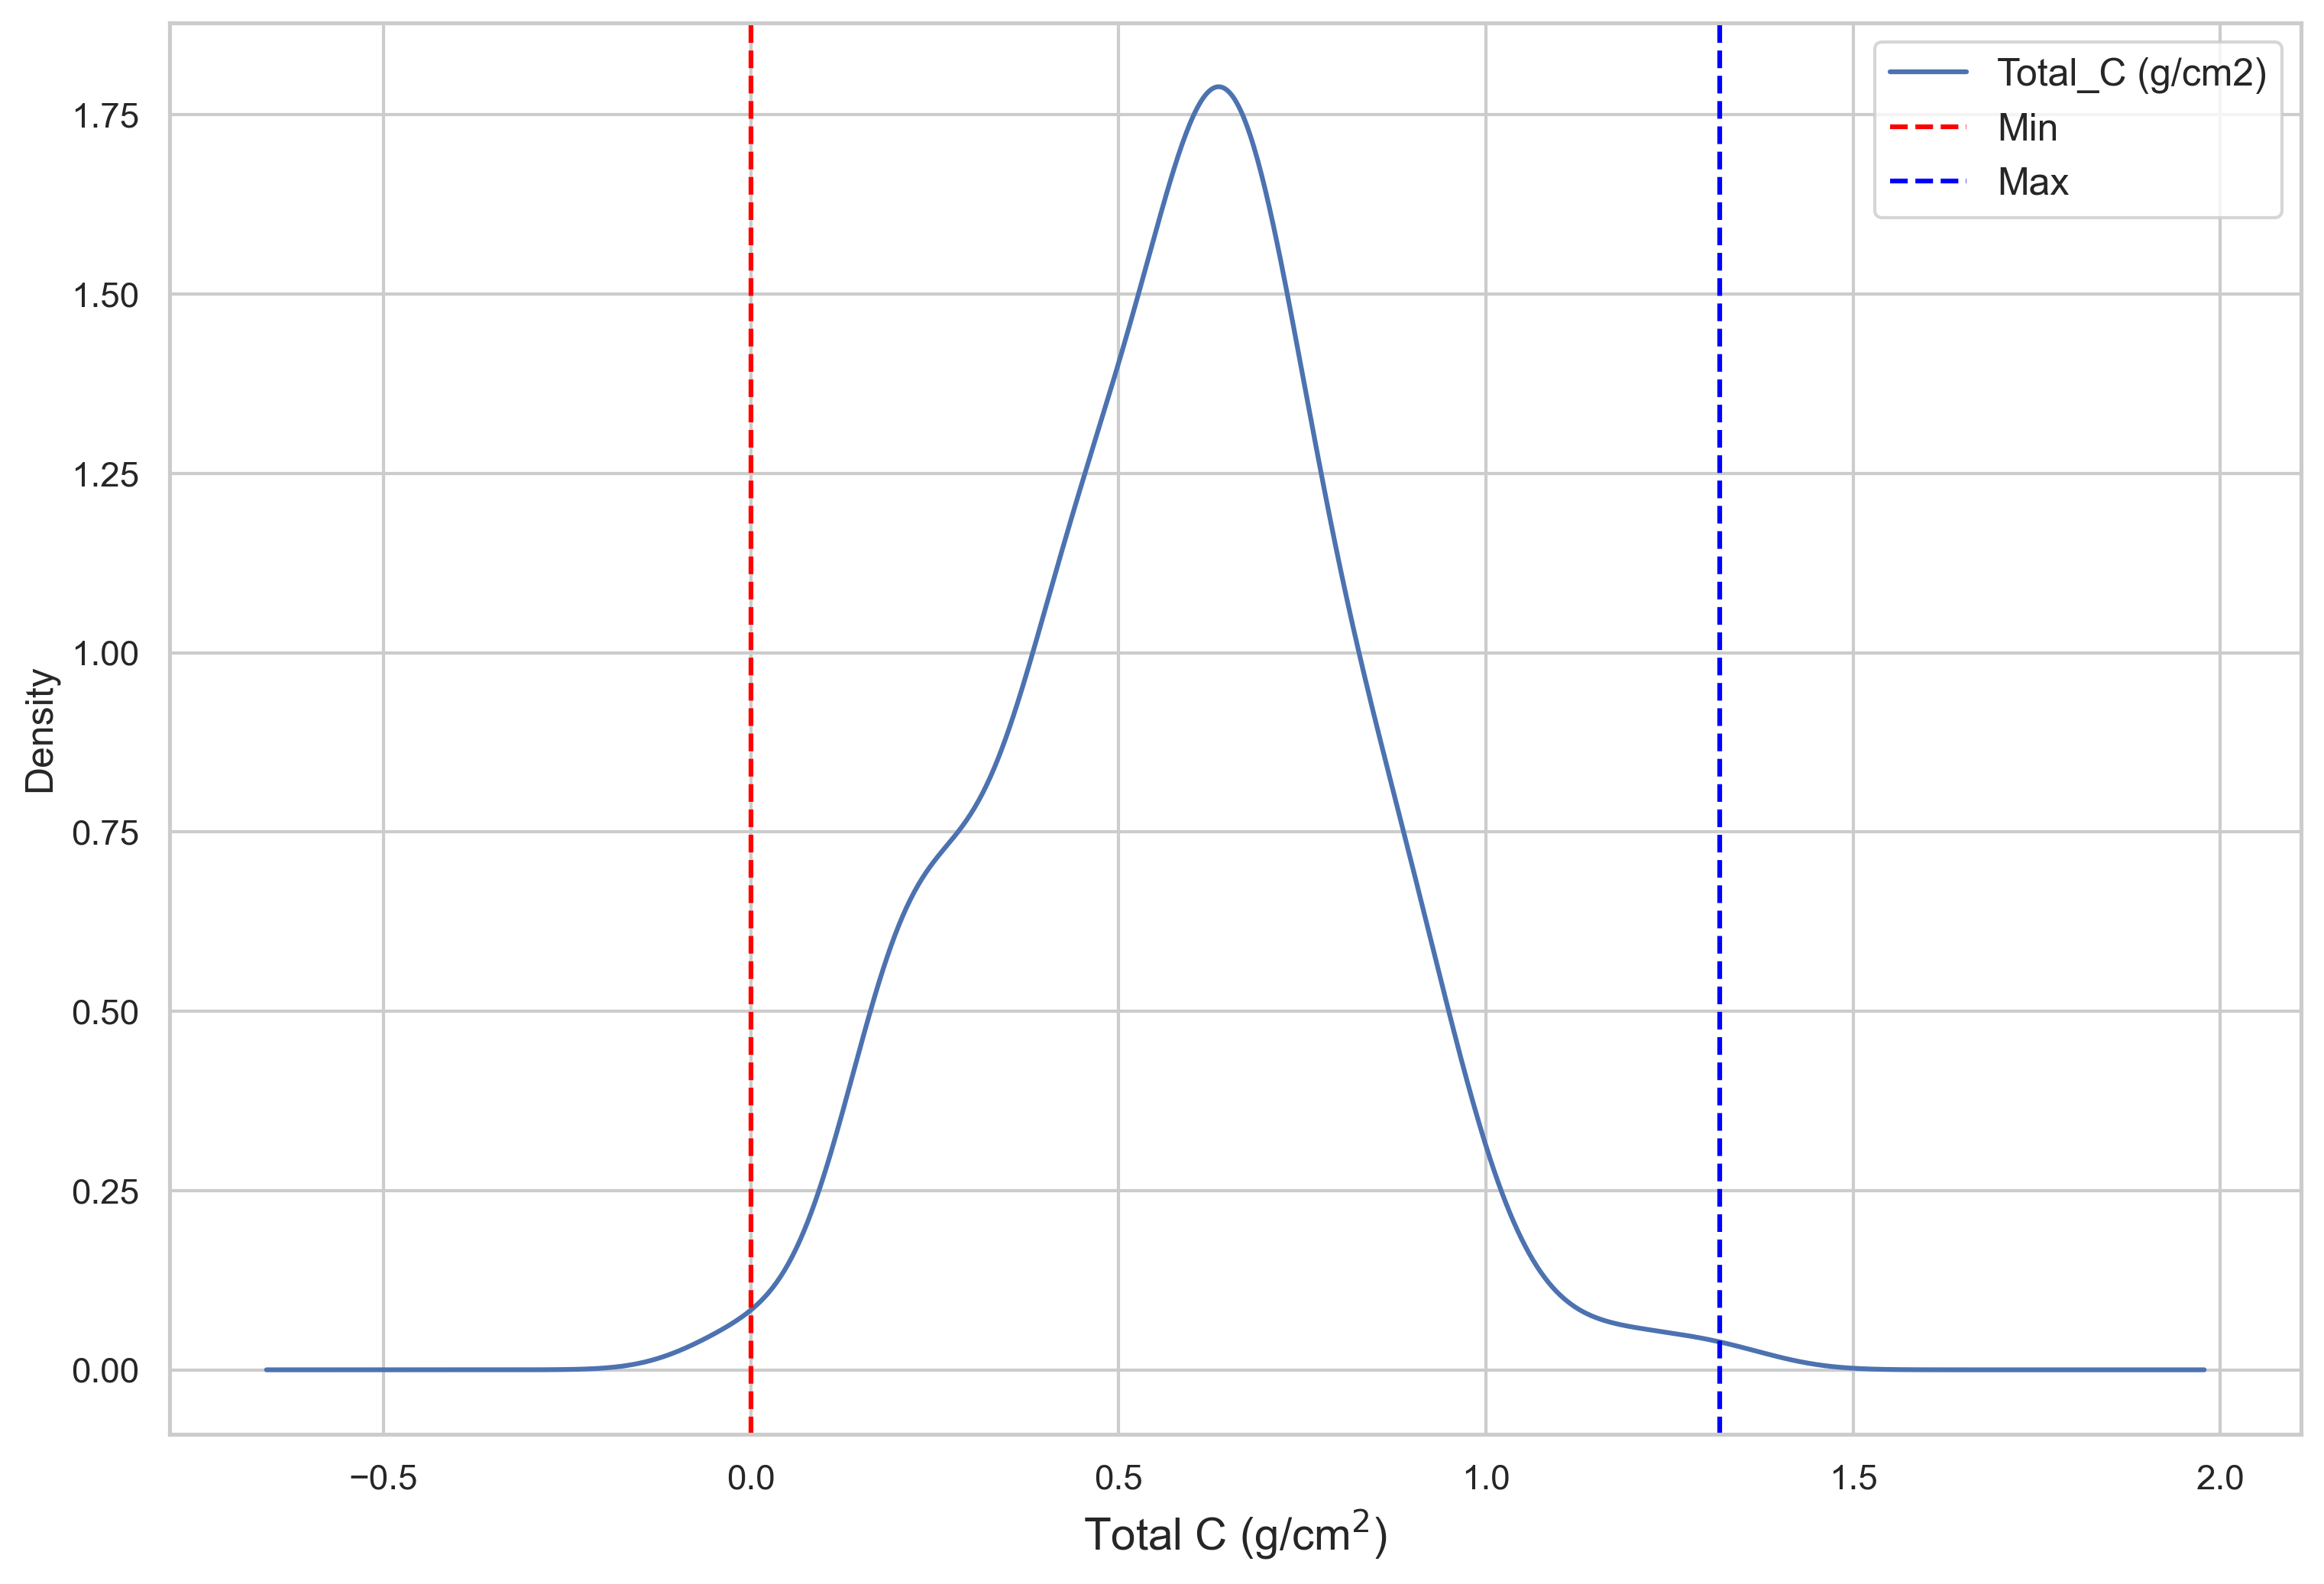

In [251]:
# DENSITY DISTRIBUTION PLOT FOR ALL YEARS TOGETHER
# Increase the font size of the labels
plt.rcParams.update({'font.size': 12})

# Increase the resolution of the plot
plt.figure(figsize=(12, 8), dpi=300)

# Plot the density distribution of column 'Total_C_g/cm2'
dry_df['Total_C (g/cm2)'].plot(kind='density')

# Set x-axis label
plt.xlabel('Total C (g/cm$^2$)', fontsize=14)

# Mark actual values on the curve
min_value = dry_df['Total_C (g/cm2)'].min()
max_value = dry_df['Total_C (g/cm2)'].max()

# Plotting the actual values on the curve
plt.axvline(x=min_value, color='red', linestyle='--', label='Min')
plt.axvline(x=max_value, color='blue', linestyle='--', label='Max')

# Display legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

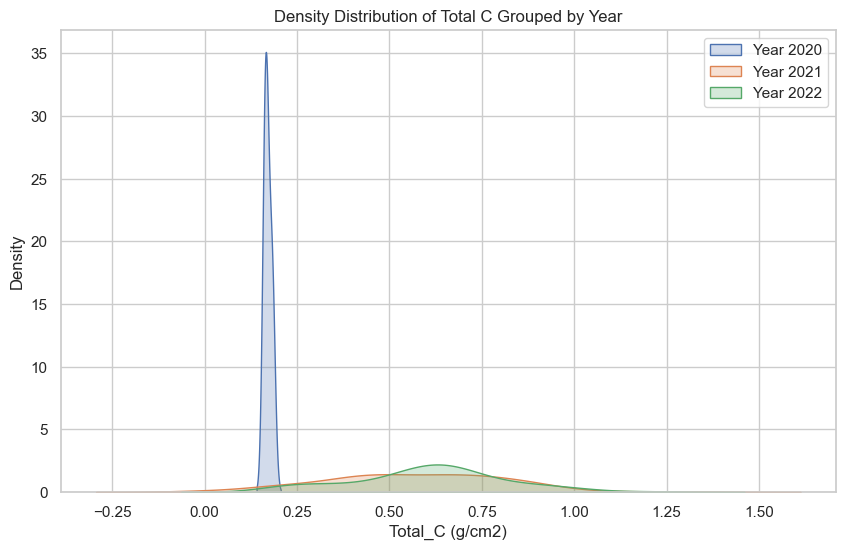

In [252]:
######=====    Density Distribution of Total C grouped by year  =====#######
# Set the style and size of the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Loop through each year and plot the density distribution
for year in dry_df['YearSample'].unique():
    subset = dry_df[dry_df['YearSample'] == year]
    sns.kdeplot(subset['Total_C (g/cm2)'], label=f'Year {year}', fill=True)

# Add labels and title
plt.xlabel('Total_C (g/cm2)')
plt.ylabel('Density')
plt.title('Density Distribution of Total C Grouped by Year')
plt.legend()

# Show the plot
plt.show()

# Create map of data

In [253]:
dry_df

In [254]:
# Load dry_irrigated dataframe 
allSamples_df = pd.read_csv(path_to_data + "Carbon&satellite_data_dryIrgted_joined_v1.csv")

# Get average of total_C over 0-6 and 6-12 inches samples 
dup_df = allSamples_df.loc[allSamples_df.SampleID.duplicated(keep=False)]
dup_df

averaged_C = pd.DataFrame([])
averaged_C['SampleID'] = dup_df.SampleID.unique()
for id in dup_df.SampleID.unique():
    averaged_C.loc[averaged_C["SampleID"] == id, "TotalC"] = np.mean(
        dup_df.loc[dup_df["SampleID"] == id, "TotalC"])

averaged_C.head(5)

allSamples_df = allSamples_df.loc[~allSamples_df.SampleID.duplicated()]
allSamples_df.loc[allSamples_df.SampleID.isin(averaged_C.SampleID),
        'TotalC'] = averaged_C['TotalC'].values

allSamples_df.loc[allSamples_df['DepthSampl'] == '0_6', 'DepthSampl'] = '0_12'
allSamples_df.loc[allSamples_df['DepthSampl'] == '6_12', 'DepthSampl'] = '0_12'
allSamples_df


(423, 75)

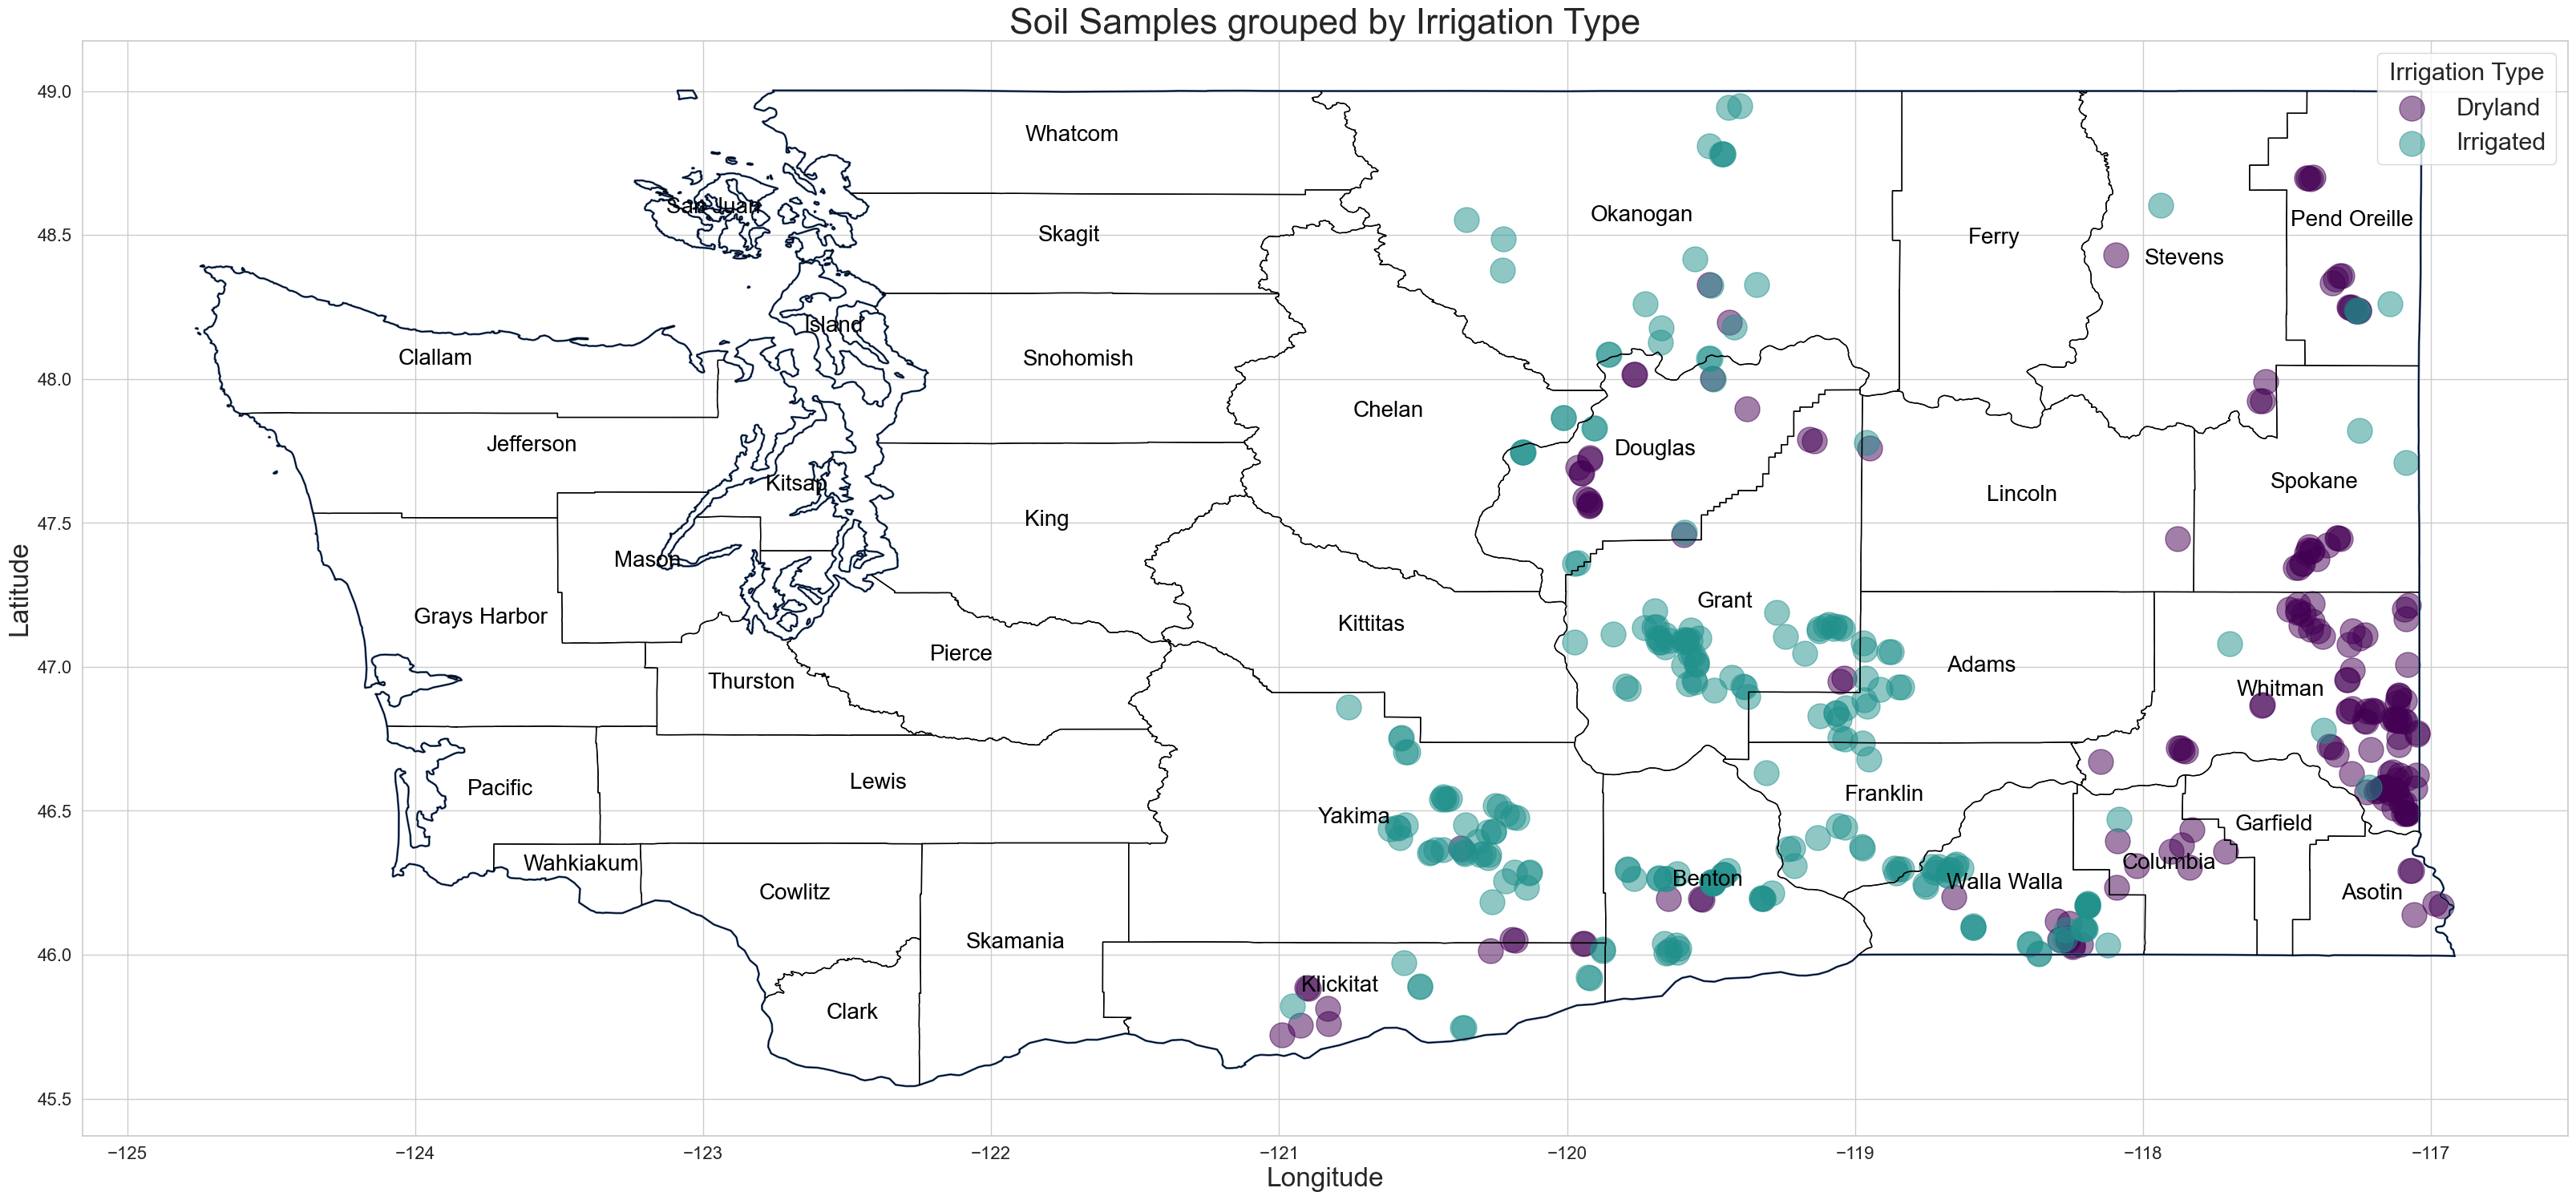

<Figure size 1920x1440 with 0 Axes>

In [255]:
allSamples_df.shape, dry_df.shape

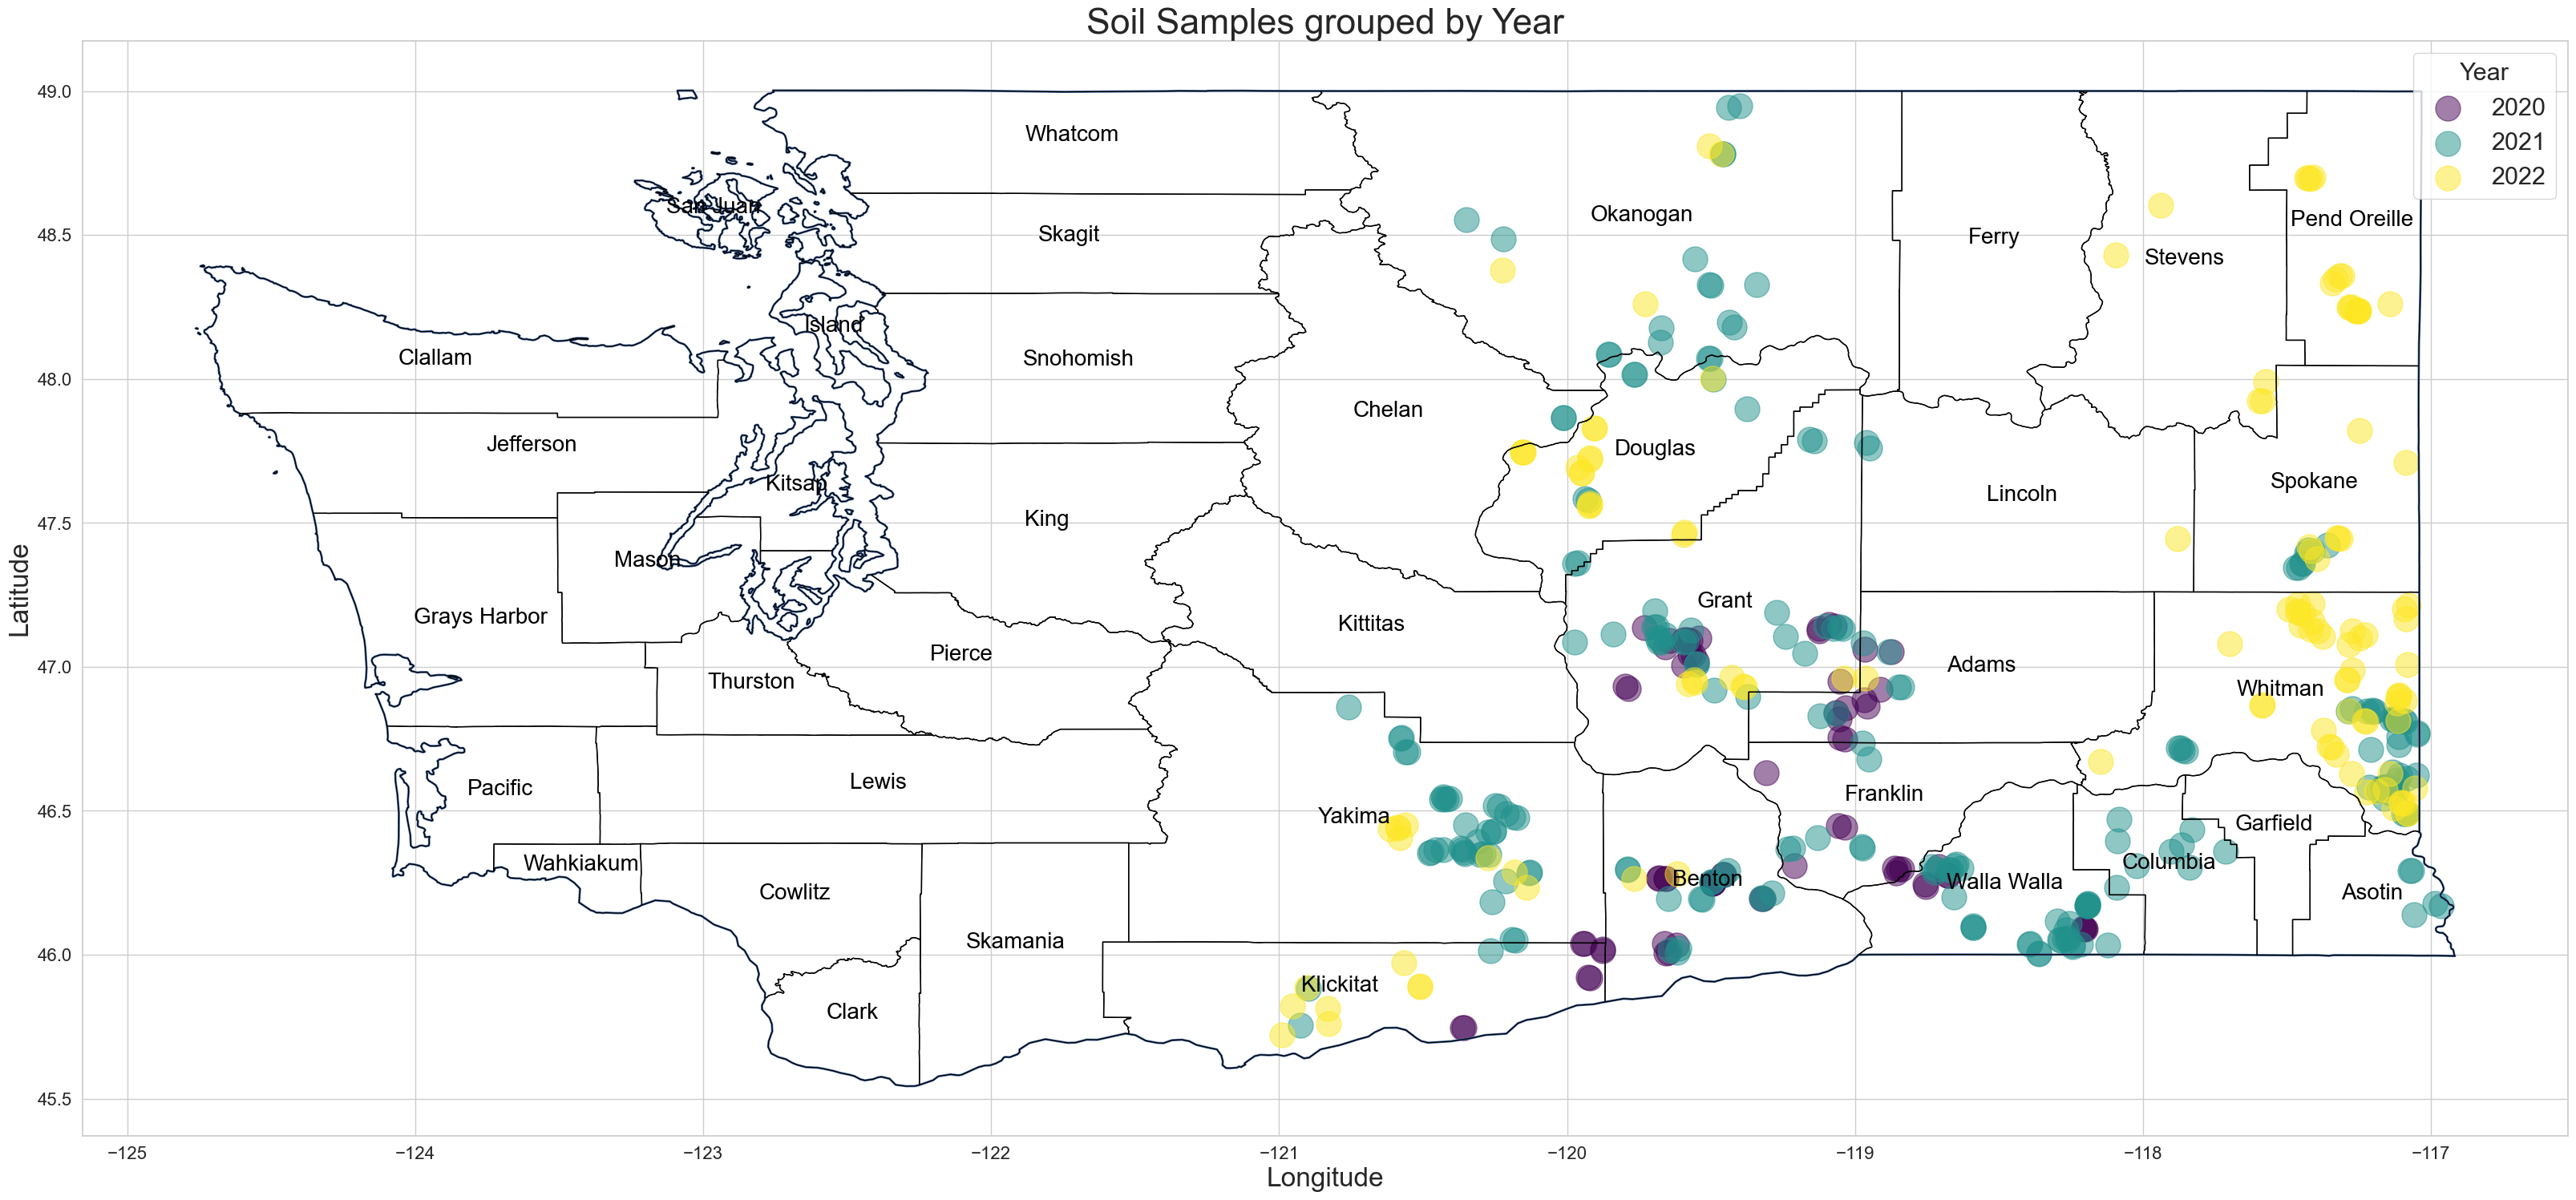

<Figure size 1920x1440 with 0 Axes>

In [256]:
dry_df.columns[dry_df.columns.isin(allSamples_df.columns)]

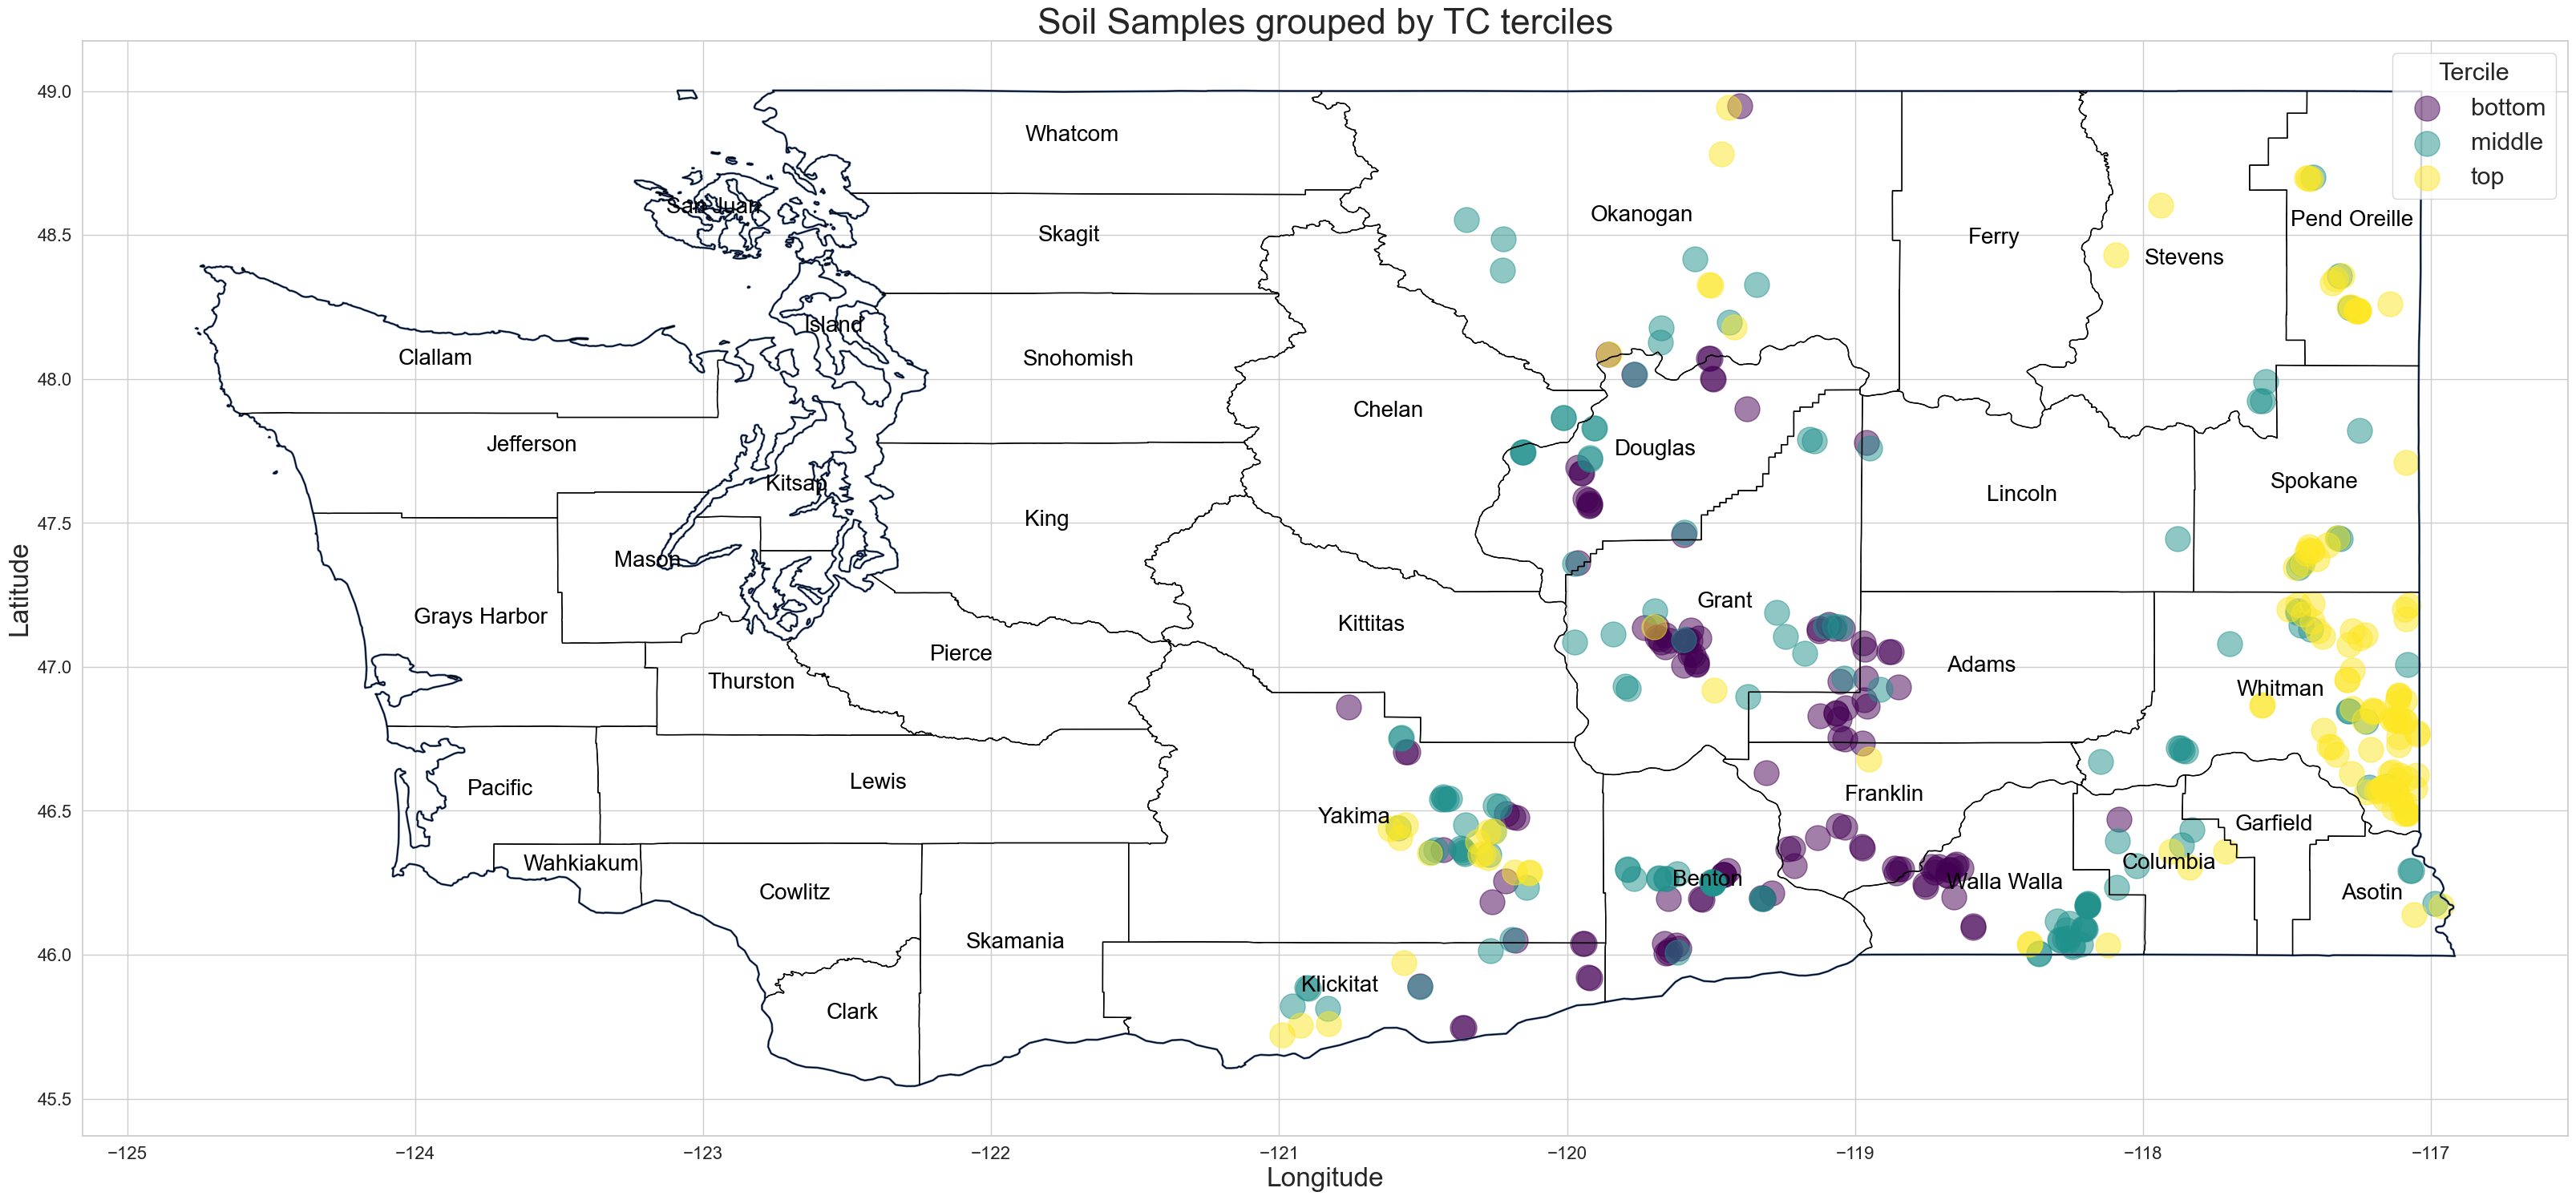

<Figure size 1920x1440 with 0 Axes>

In [257]:


# Convert dataframes to GeoDataFrames
dry_df = gpd.GeoDataFrame(dry_df, geometry=gpd.points_from_xy(dry_df.Longitude, dry_df.Latitude))
allSamples_df = gpd.GeoDataFrame(allSamples_df, geometry=gpd.points_from_xy(allSamples_df.Longitude, allSamples_df.Latitude))

# Remove reduntant columns
allSamples_df = allSamples_df.loc[:, 'TotalC':].copy()
dry_df = dry_df.loc[:, 'TotalC':].copy()

dry_df.reset_index(drop = True, inplace=True)
allSamples_df.reset_index(drop = True, inplace=True)

dry_df = dry_df[dry_df.columns[dry_df.columns.isin(allSamples_df.columns)]]

# merge two dataframes
irrigated_df = allSamples_df.loc[
    ~(allSamples_df['SampleID'].isin(dry_df['SampleID']))].copy()
# add irrigation column
irrigated_df['Irrigation'] = 'Irrigated'
dry_df['Irrigation'] = 'Dryland'

df = pd.concat([dry_df, irrigated_df])
dry_df = tCarbon_to_gcm2(dry_df)
# df

/Users/aminnorouzi/opt/anaconda3/envs/dsfas/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/aminnorouzi/opt/anaconda3/envs/dsfas/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/aminnorouzi/opt/anaconda3/envs/dsfas/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/aminnorouzi/opt/anaconda3/envs/dsfas/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/aminnorouzi/opt/anaconda3/envs/dsfas/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/aminnorouzi/opt/anacond

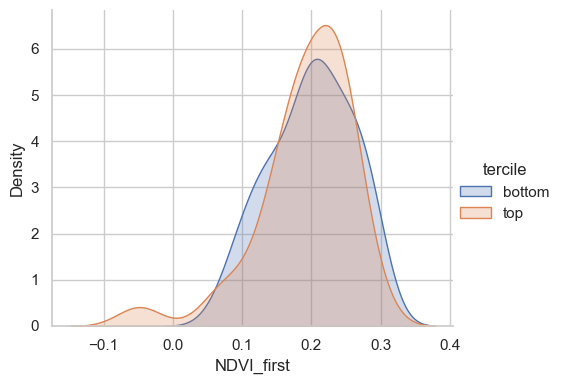

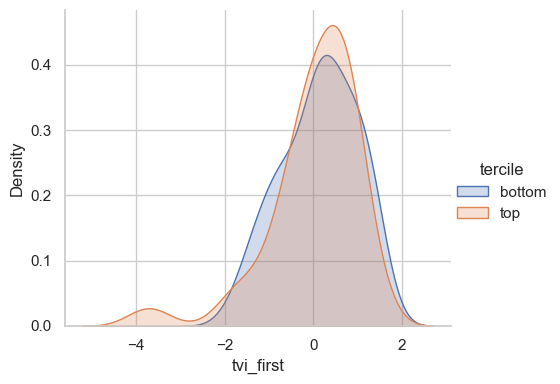

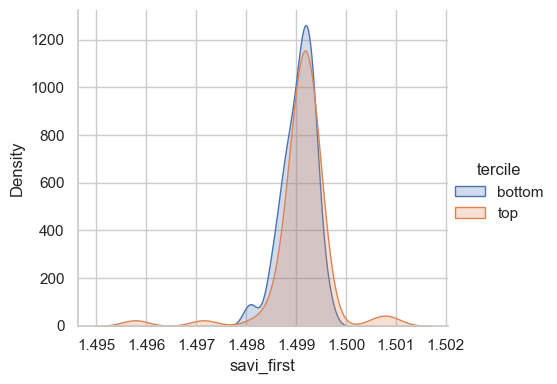

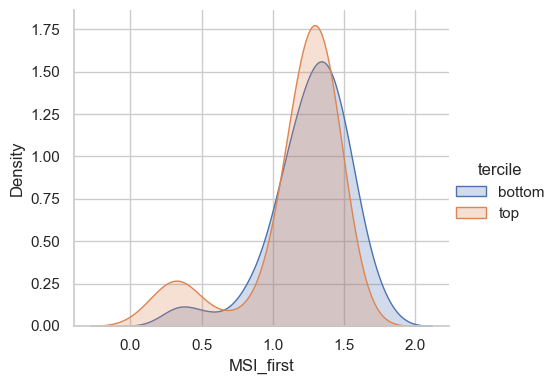

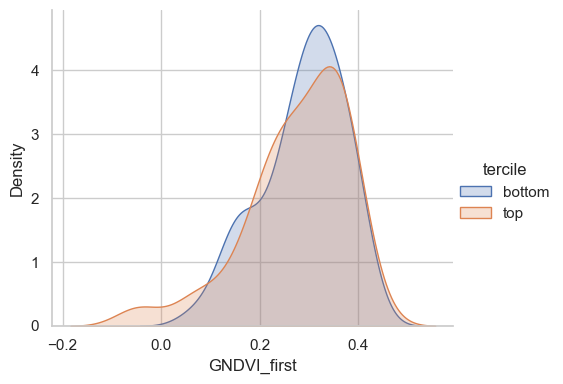

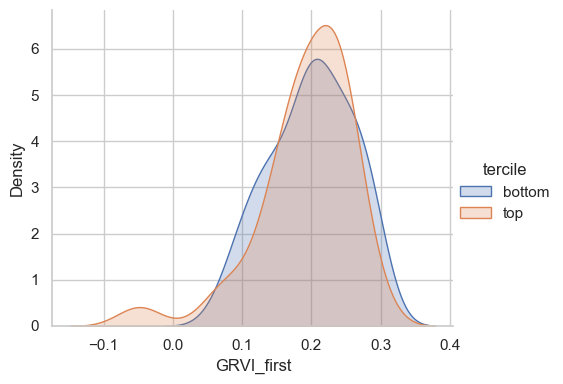

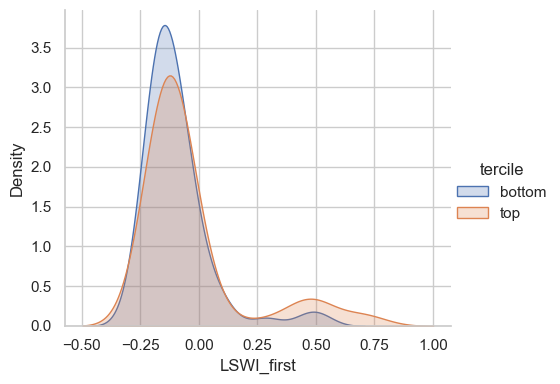

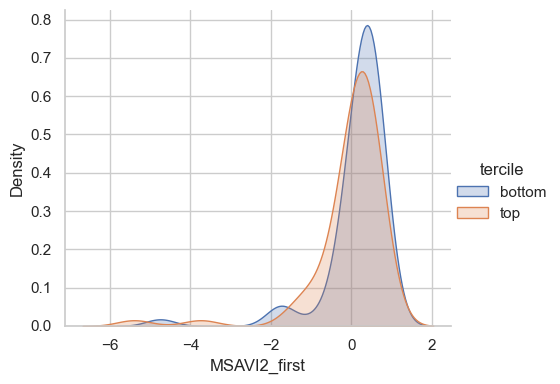

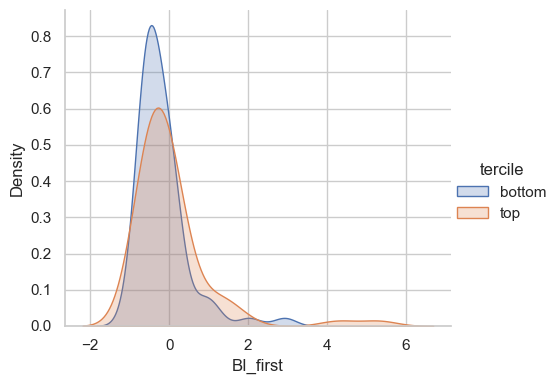

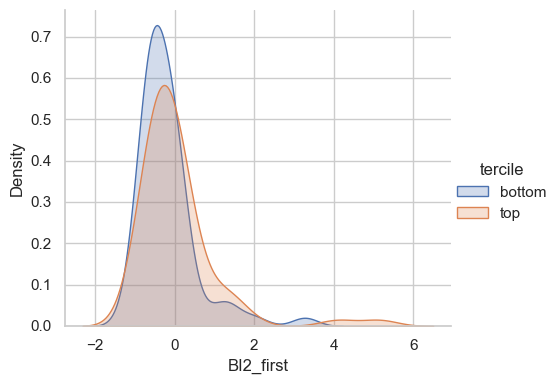

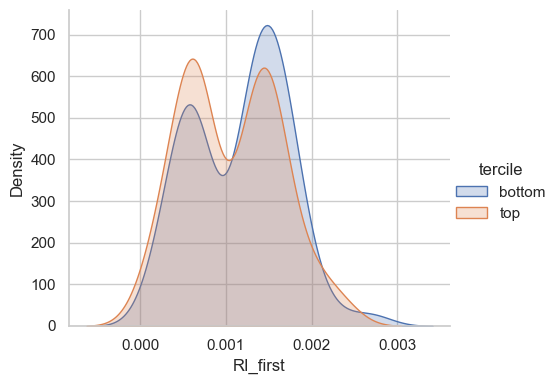

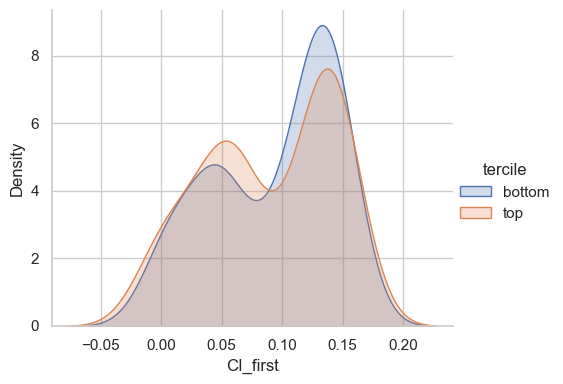

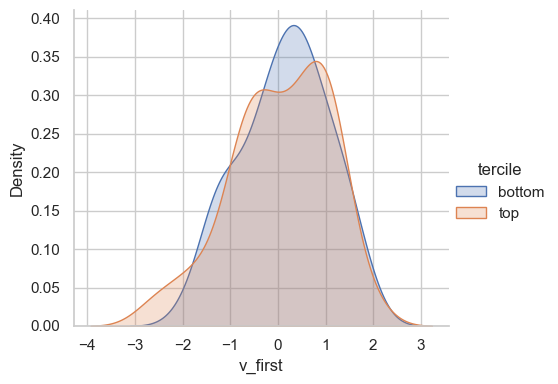

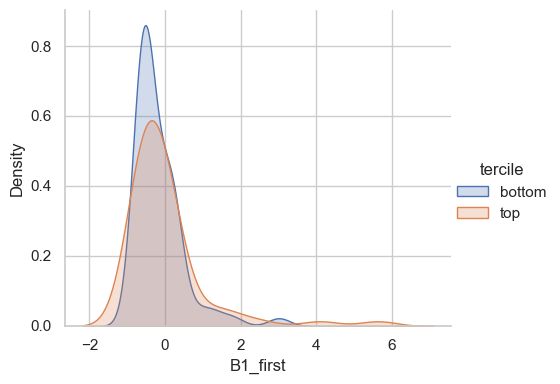

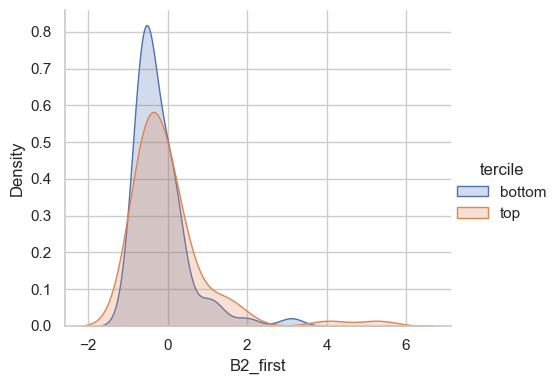

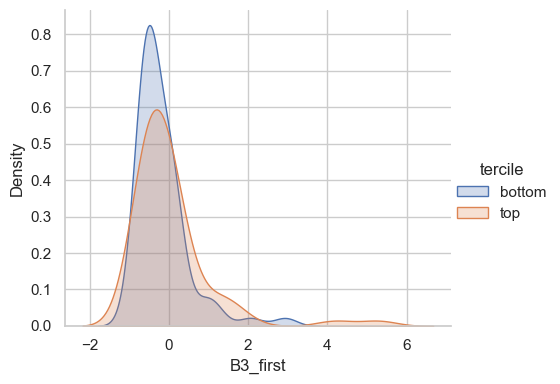

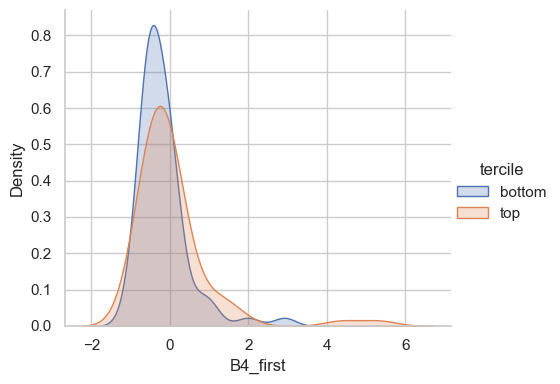

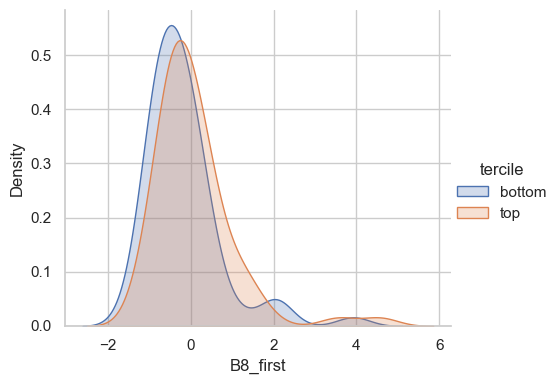

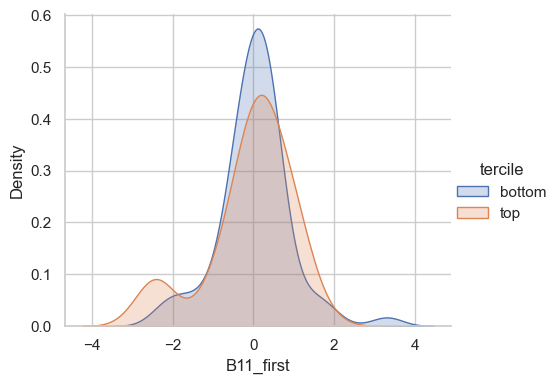

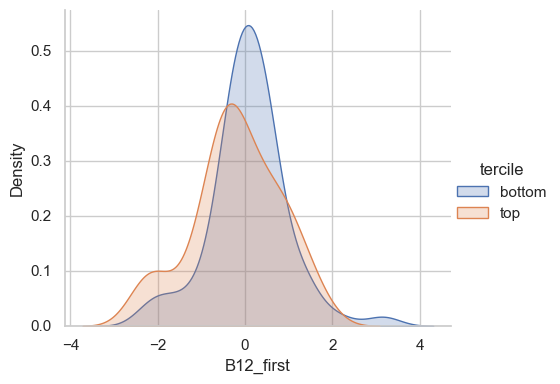

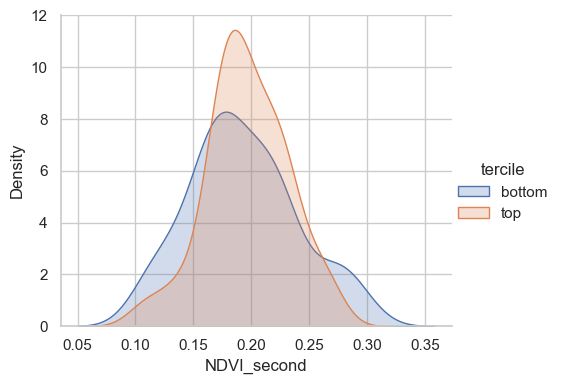

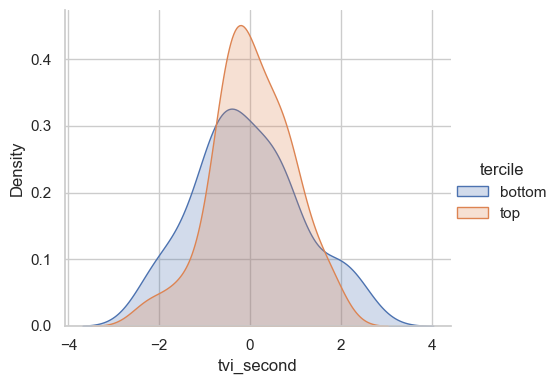

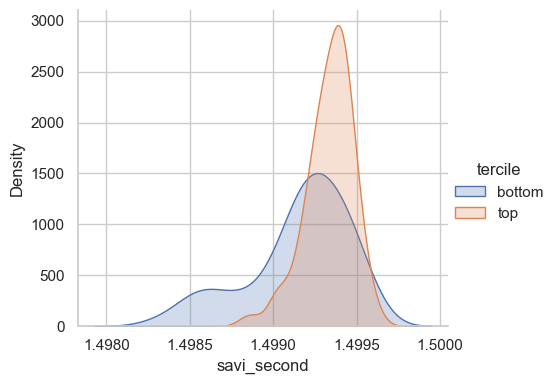

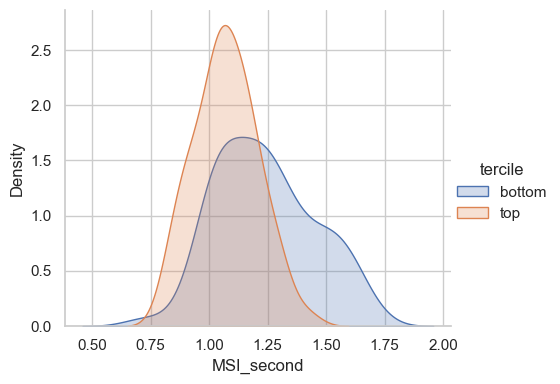

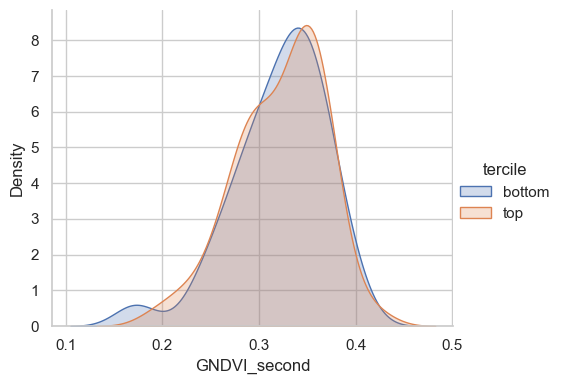

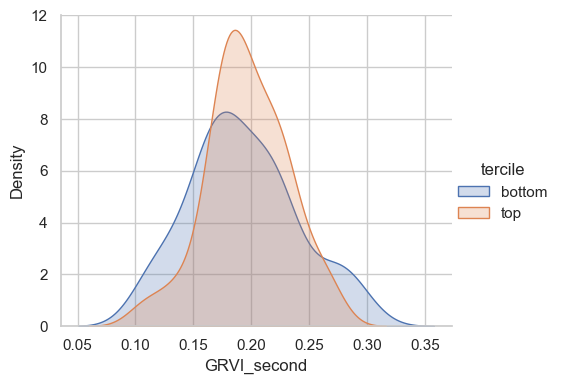

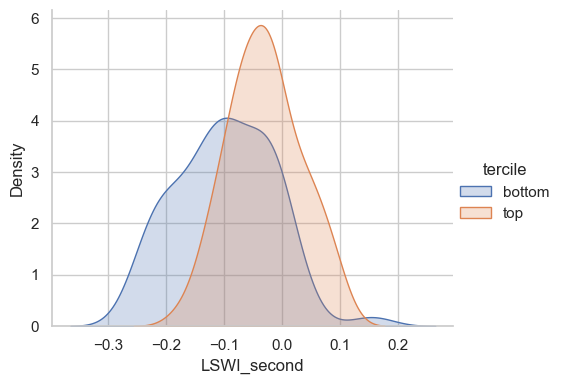

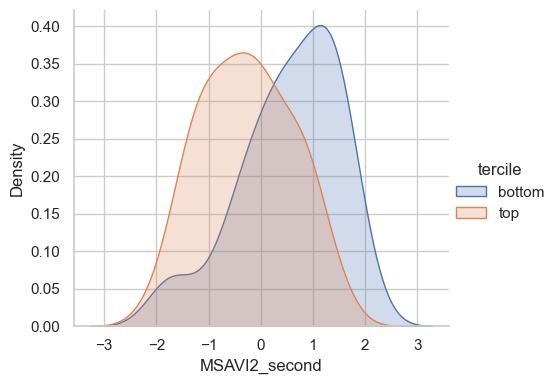

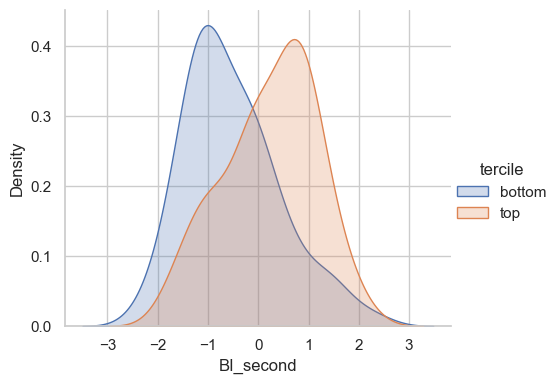

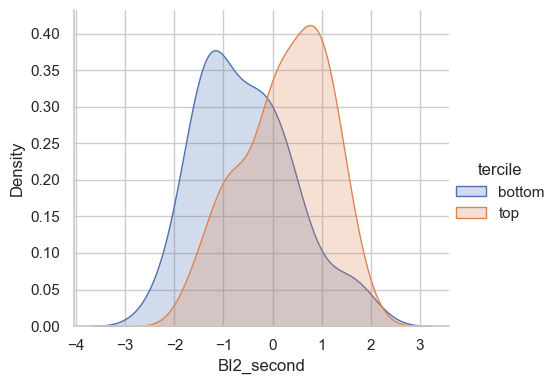

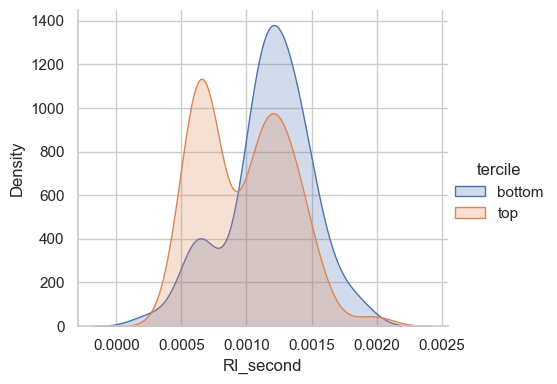

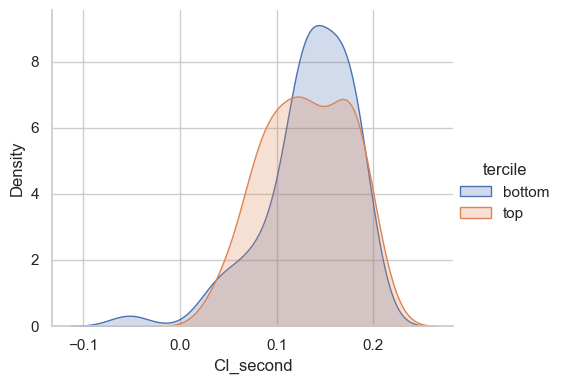

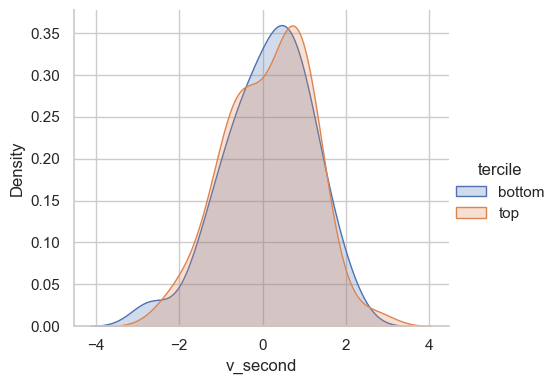

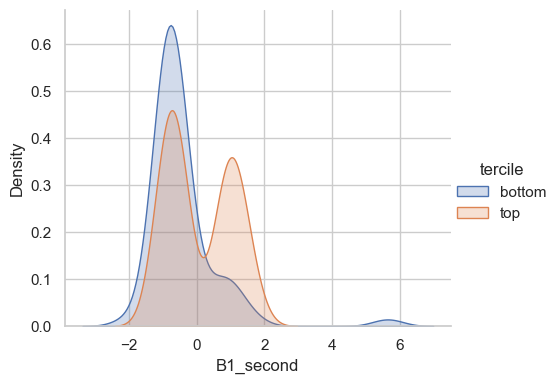

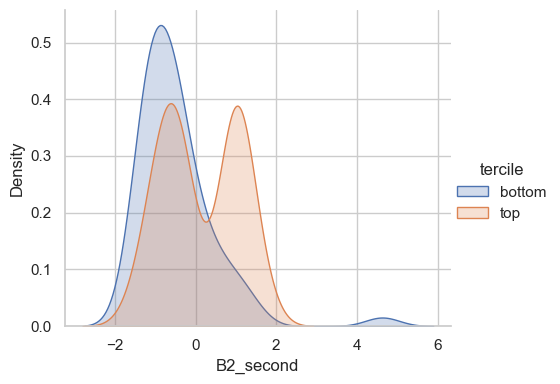

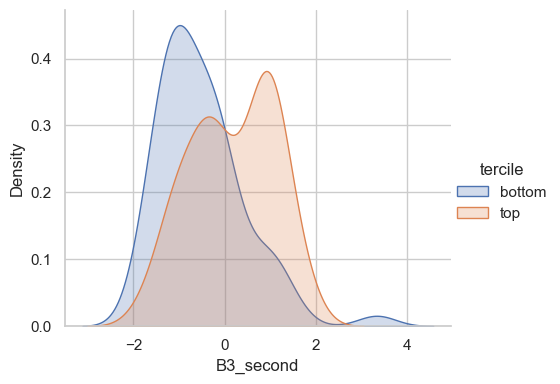

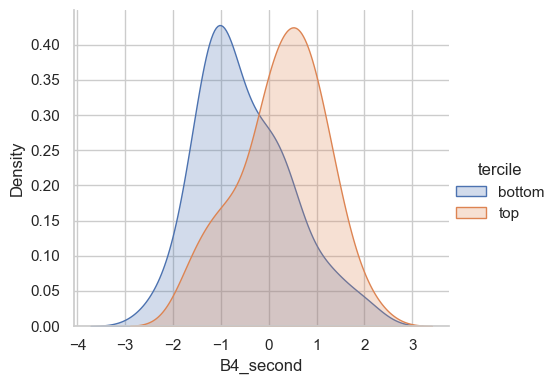

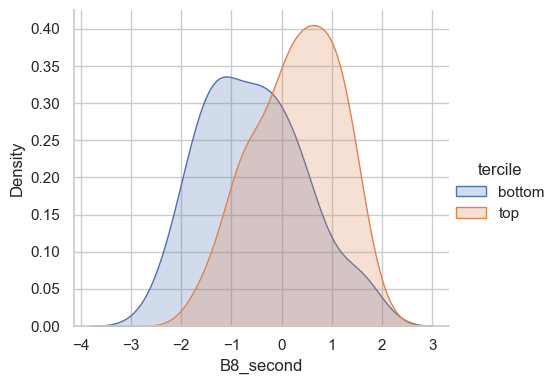

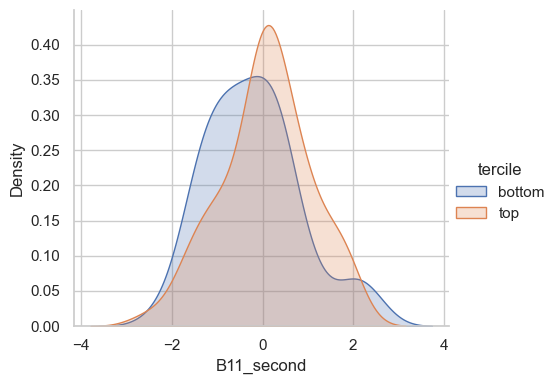

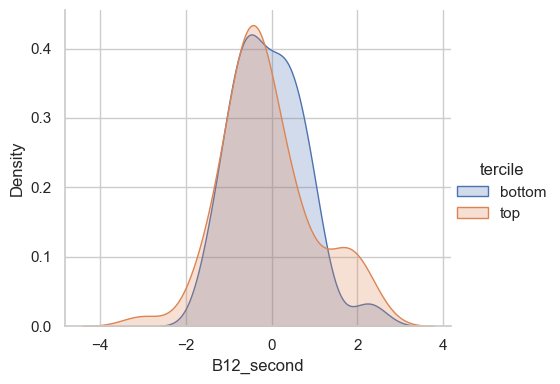

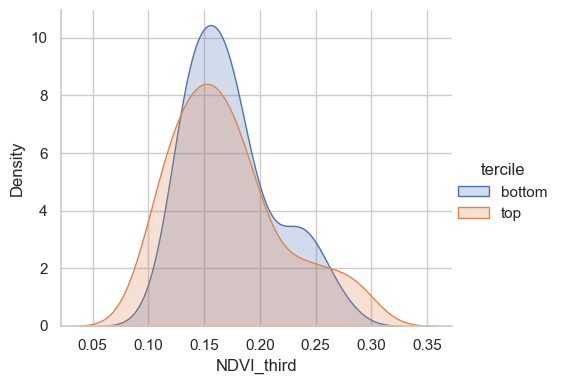

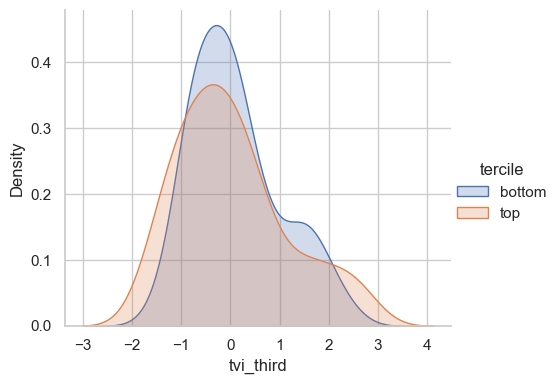

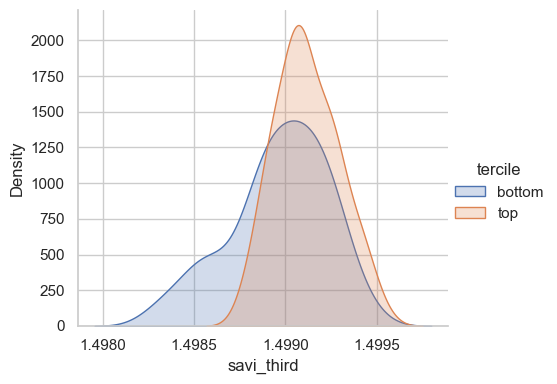

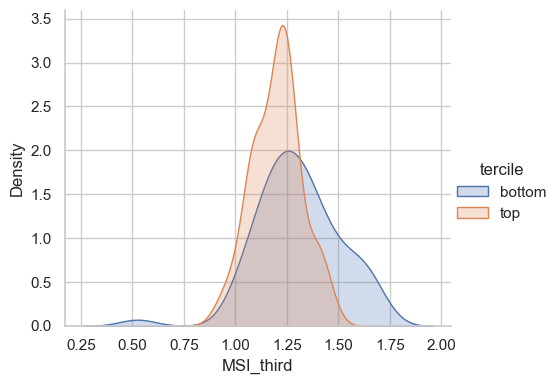

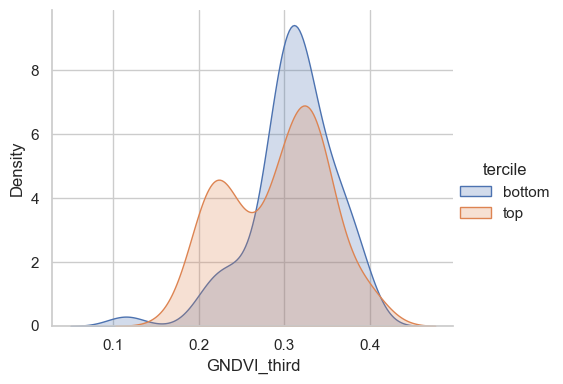

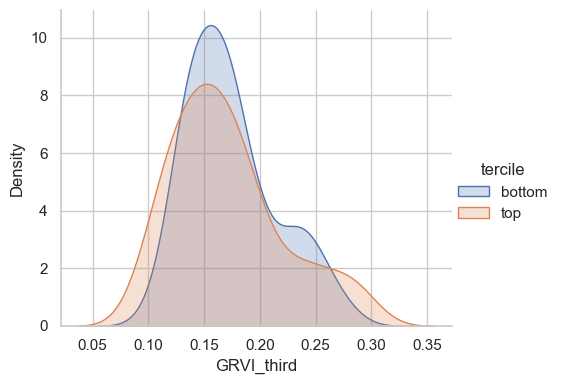

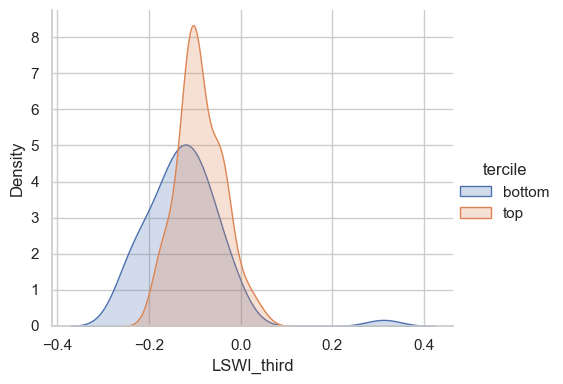

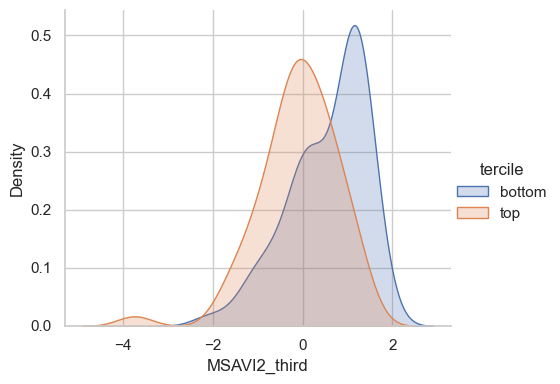

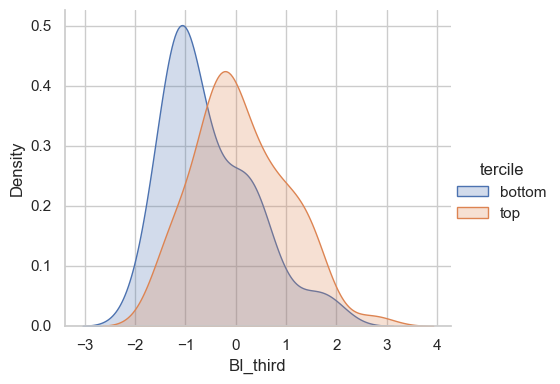

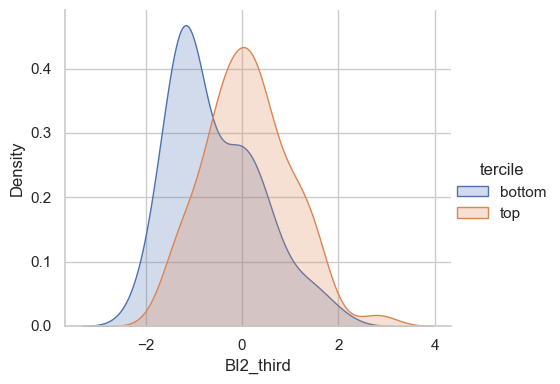

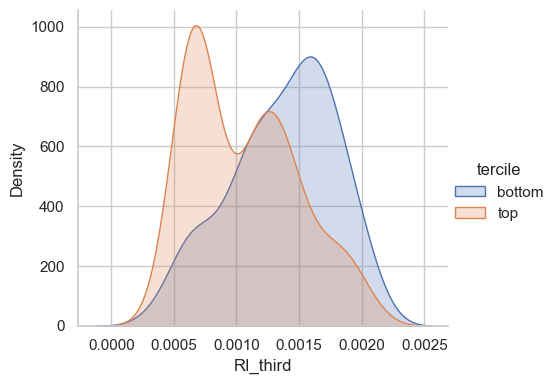

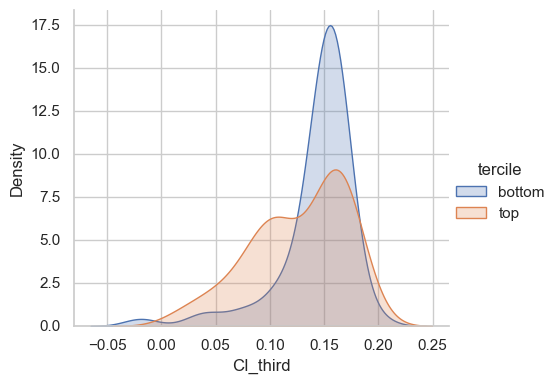

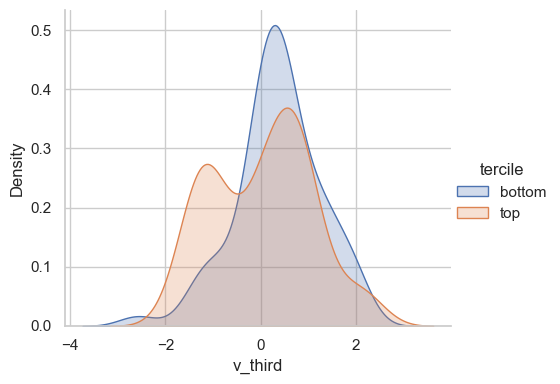

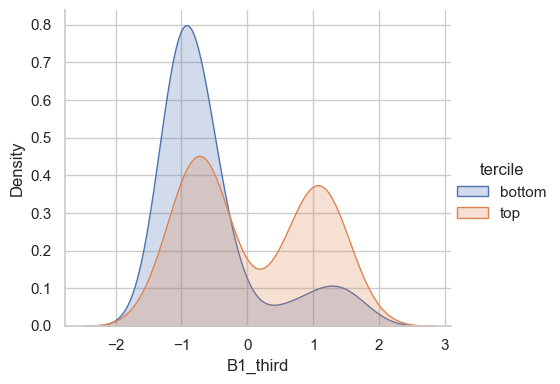

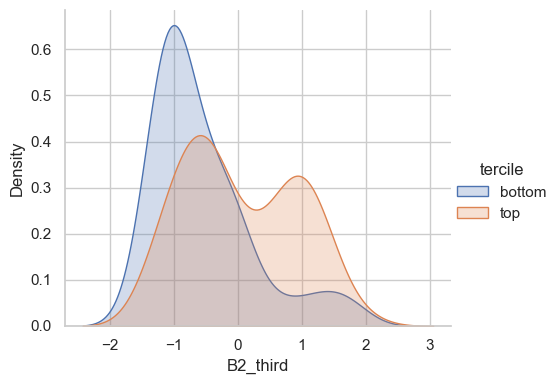

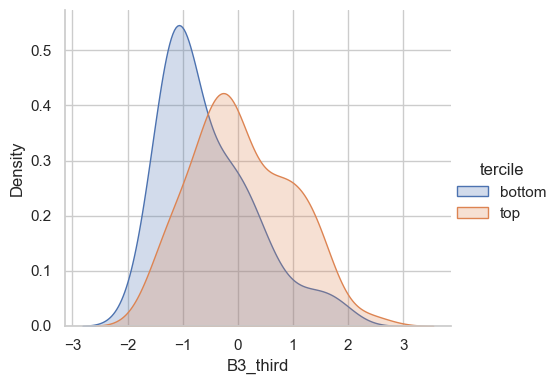

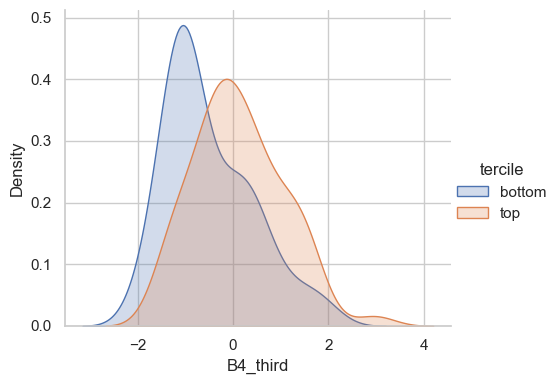

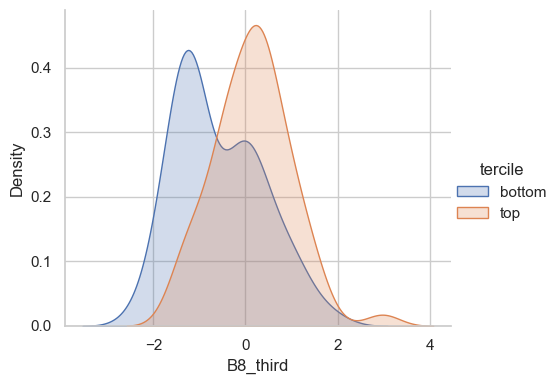

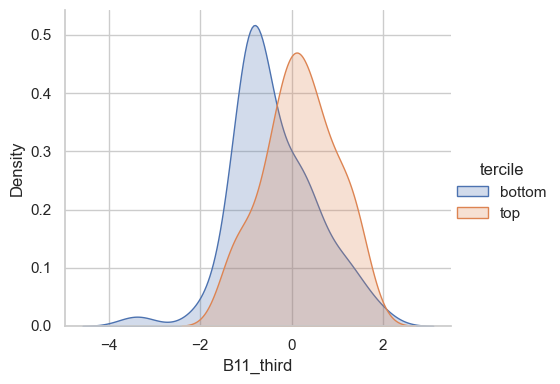

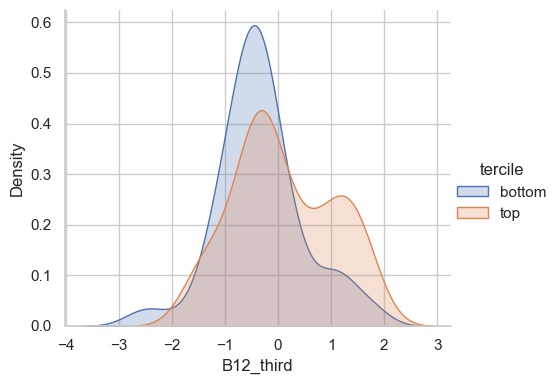

In [258]:
(dry_df.columns == irrigated_df.columns)

In [ ]:
len(df['SampleID'].unique())

In [ ]:
df['Irrigation'].value_counts()

In [ ]:
######=====  Sample points grouped by irrigation type  =====#########
# Load U.S. states shapefiles (You can download from U.S. Census Bureau or other sources)
path_to_shpfiles = path_to_data + "GIS_Data/"

us_states = gpd.read_file(path_to_shpfiles + "cb_2022_us_state_500k/cb_2022_us_state_500k.shp")
us_counties = gpd.read_file(path_to_shpfiles + "cb_2022_us_county_500k/cb_2022_us_county_500k.shp")

# Filter for just Washington state
wa_state = us_states[us_states['NAME'] == 'Washington'].copy()
wa_counties = us_counties[us_counties['STATE_NAME'] == 'Washington']
wa_counties

# extract two colors from the 'viridis' colormap
color_map_values = [0, 0.5]  # Start and end of the colormap
colors_from_viridis = plt.cm.viridis(color_map_values)

# Convert to hexadecimal
colors_hex = [mcolors.to_hex(c) for c in colors_from_viridis]


# Plot Washington state
# Create a color map dictionary
color_map_dict = {'Dryland': colors_hex[0], 'Irrigated': colors_hex[1]}

# Map the colors to the DataFrame
df['color'] = df['Irrigation'].map(color_map_dict)

ax = wa_state.boundary.plot(figsize=(40, 20), linewidth=2)
wa_counties.boundary.plot(ax=ax, linewidth=1, edgecolor="black")
wa_counties.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=20, color='black'), axis=1)

irrigation_counts = df['Irrigation'].value_counts()


# Plot the points with the specified colors
labels_with_counts = {}
for color in color_map_dict.values():
    subset = df[df['color'] == color]
    irrigation_type = subset['Irrigation'].unique()[0]
    label_with_count = f"{irrigation_type} (n={irrigation_counts[irrigation_type]})"
    labels_with_counts[irrigation_type] = label_with_count
    subset.plot(ax=ax, marker='o', color=color, markersize=500,
                alpha=0.5, label=label_with_count)

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Irrigation Type', fontsize=22, title_fontsize=22)

# Change tick label sizes
ax.tick_params(axis='both', which='major', labelsize=16)

# Add title and axis labels
plt.title("Soil Samples grouped by Irrigation Type", fontsize=32)
plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)

# Show the plot
plt.figure(dpi=300)
plt.show()

In [ ]:
######=====     Distribution of Total C grouped by year  =====#######

# extract two colors from the 'viridis' colormap
color_map_values = [0, 0.5, 1]  # Start and end of the colormap
colors_from_viridis = plt.cm.viridis(color_map_values)

# Convert to hexadecimal
colors_hex = [mcolors.to_hex(c) for c in colors_from_viridis]


# Plot Washington state
# Create a color map dictionary
color_map_dict = {2020: colors_hex[0],
                  2021: colors_hex[1], 2022: colors_hex[2]}

# Map the colors to the DataFrame
df['Yearcolor'] = df['YearSample'].map(color_map_dict)

ax = wa_state.boundary.plot(figsize=(40, 20), linewidth=2)
wa_counties.boundary.plot(ax=ax, linewidth=1, edgecolor="black")
wa_counties.apply(lambda x: ax.annotate(
    text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=20, color='black'), axis=1)

year_counts = df['YearSample'].value_counts()

# Plot the points with the specified colors
for color in color_map_dict.values():
    subset = df[df['Yearcolor'] == color]
    year_number = subset['YearSample'].unique()[0]
    label_with_number = f'{year_number} (n = {year_counts[year_number]})'
    subset.plot(ax=ax, marker='o', color=color, markersize=500,
                alpha=0.5, label=label_with_number)

# Add a legendz
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Year',
          fontsize=22, title_fontsize=22)

# Change tick label sizes
ax.tick_params(axis='both', which='major', labelsize=16)

# Add title and axis labels
plt.title("Soil Samples grouped by Year", fontsize=32)
plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)

# Show the plot
plt.figure(dpi=300)
plt.show()

In [ ]:
######=====     Distribution of Total C grouped by terciles =====#######
# Set the terciles to use for separating the data
y_var = "Total_C (g/cm2)"
bottom_tercile = np.percentile(df[y_var], 33.33)
top_tercile = np.percentile(df[y_var], 66.66)

# Create a new column in the DataFrame to indicate whether each row is in the top, middle, or bottom tercile
df['tercile'] = pd.cut(df[y_var], bins=[df[y_var].min(
), bottom_tercile, top_tercile, df[y_var].max()], labels=['bottom', 'middle', 'top'])

######=====     Distribution of Total C map grouped by year  =====#######
######=====  Sample points grouped by irrigation type  =====#########

# extract two colors from the 'viridis' colormap
color_map_values = [0, 0.5, 1]  # Start and end of the colormap
colors_from_viridis = plt.cm.viridis(color_map_values)

# Convert to hexadecimal
colors_hex = [mcolors.to_hex(c) for c in colors_from_viridis]


# Plot Washington state
# Create a color map dictionary
color_map_dict = {'bottom': colors_hex[0],
                  'middle': colors_hex[1], 'top': colors_hex[2]}

# Map the colors to the DataFrame
df['tercile_color'] = df['tercile'].map(color_map_dict)

ax = wa_state.boundary.plot(figsize=(40, 20), linewidth=2)
wa_counties.boundary.plot(ax=ax, linewidth=1, edgecolor="black")
wa_counties.apply(lambda x: ax.annotate(
    text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=20, color='black'), axis=1)

tercile_counts = df['tercile'].value_counts()
# Plot the points with the specified colors
for color in color_map_dict.values():
    subset = df[df['tercile_color'] == color]
    tercile = subset['tercile'].unique()[0]
    label_with_number = f'{tercile} (n = {tercile_counts[tercile]})'
    subset.plot(ax=ax, marker='o', color=color, markersize=500,
                alpha=0.5, label=label_with_number)

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Tercile',
          fontsize=22, title_fontsize=22)

# Change tick label sizes
ax.tick_params(axis='both', which='major', labelsize=16)

# Add title and axis labels
plt.title("Soil Samples grouped by TC terciles", fontsize=32)
plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)

# Show the plot
plt.figure(dpi=300)
plt.show()


In [ ]:
# Renaming columns
df.columns = df.columns.str.replace('_first', '_MAM')
df.columns = df.columns.str.replace('_second', '_JJA')
df.columns = df.columns.str.replace('_third', '_SON')
df.to_csv(path_to_data + 'data_snapshot.csv')

In [247]:
df.columns

Index(['TotalC', 'SampleID', 'DepthSampl', 'Latitude', 'Longitude',
       'YearSample', 'BD_g_cm3', 'InorganicC', 'poxC_mg.kg', 'NDVI_first',
       'tvi_first', 'savi_first', 'MSI_first', 'GNDVI_first', 'GRVI_first',
       'LSWI_first', 'MSAVI2_first', 'WDVI_first', 'BI_first', 'BI2_first',
       'RI_first', 'CI_first', 'v_first', 'B1_first', 'B2_first', 'B3_first',
       'B4_first', 'B8_first', 'B11_first', 'B12_first', 'NDVI_second',
       'tvi_second', 'savi_second', 'MSI_second', 'GNDVI_second',
       'GRVI_second', 'LSWI_second', 'MSAVI2_second', 'WDVI_second',
       'BI_second', 'BI2_second', 'RI_second', 'CI_second', 'v_second',
       'B1_second', 'B2_second', 'B3_second', 'B4_second', 'B8_second',
       'B11_second', 'B12_second', 'NDVI_third', 'tvi_third', 'savi_third',
       'MSI_third', 'GNDVI_third', 'GRVI_third', 'LSWI_third', 'MSAVI2_third',
       'WDVI_third', 'BI_third', 'BI2_third', 'RI_third', 'CI_third',
       'v_third', 'B1_third', 'B2_third', 'B3_third

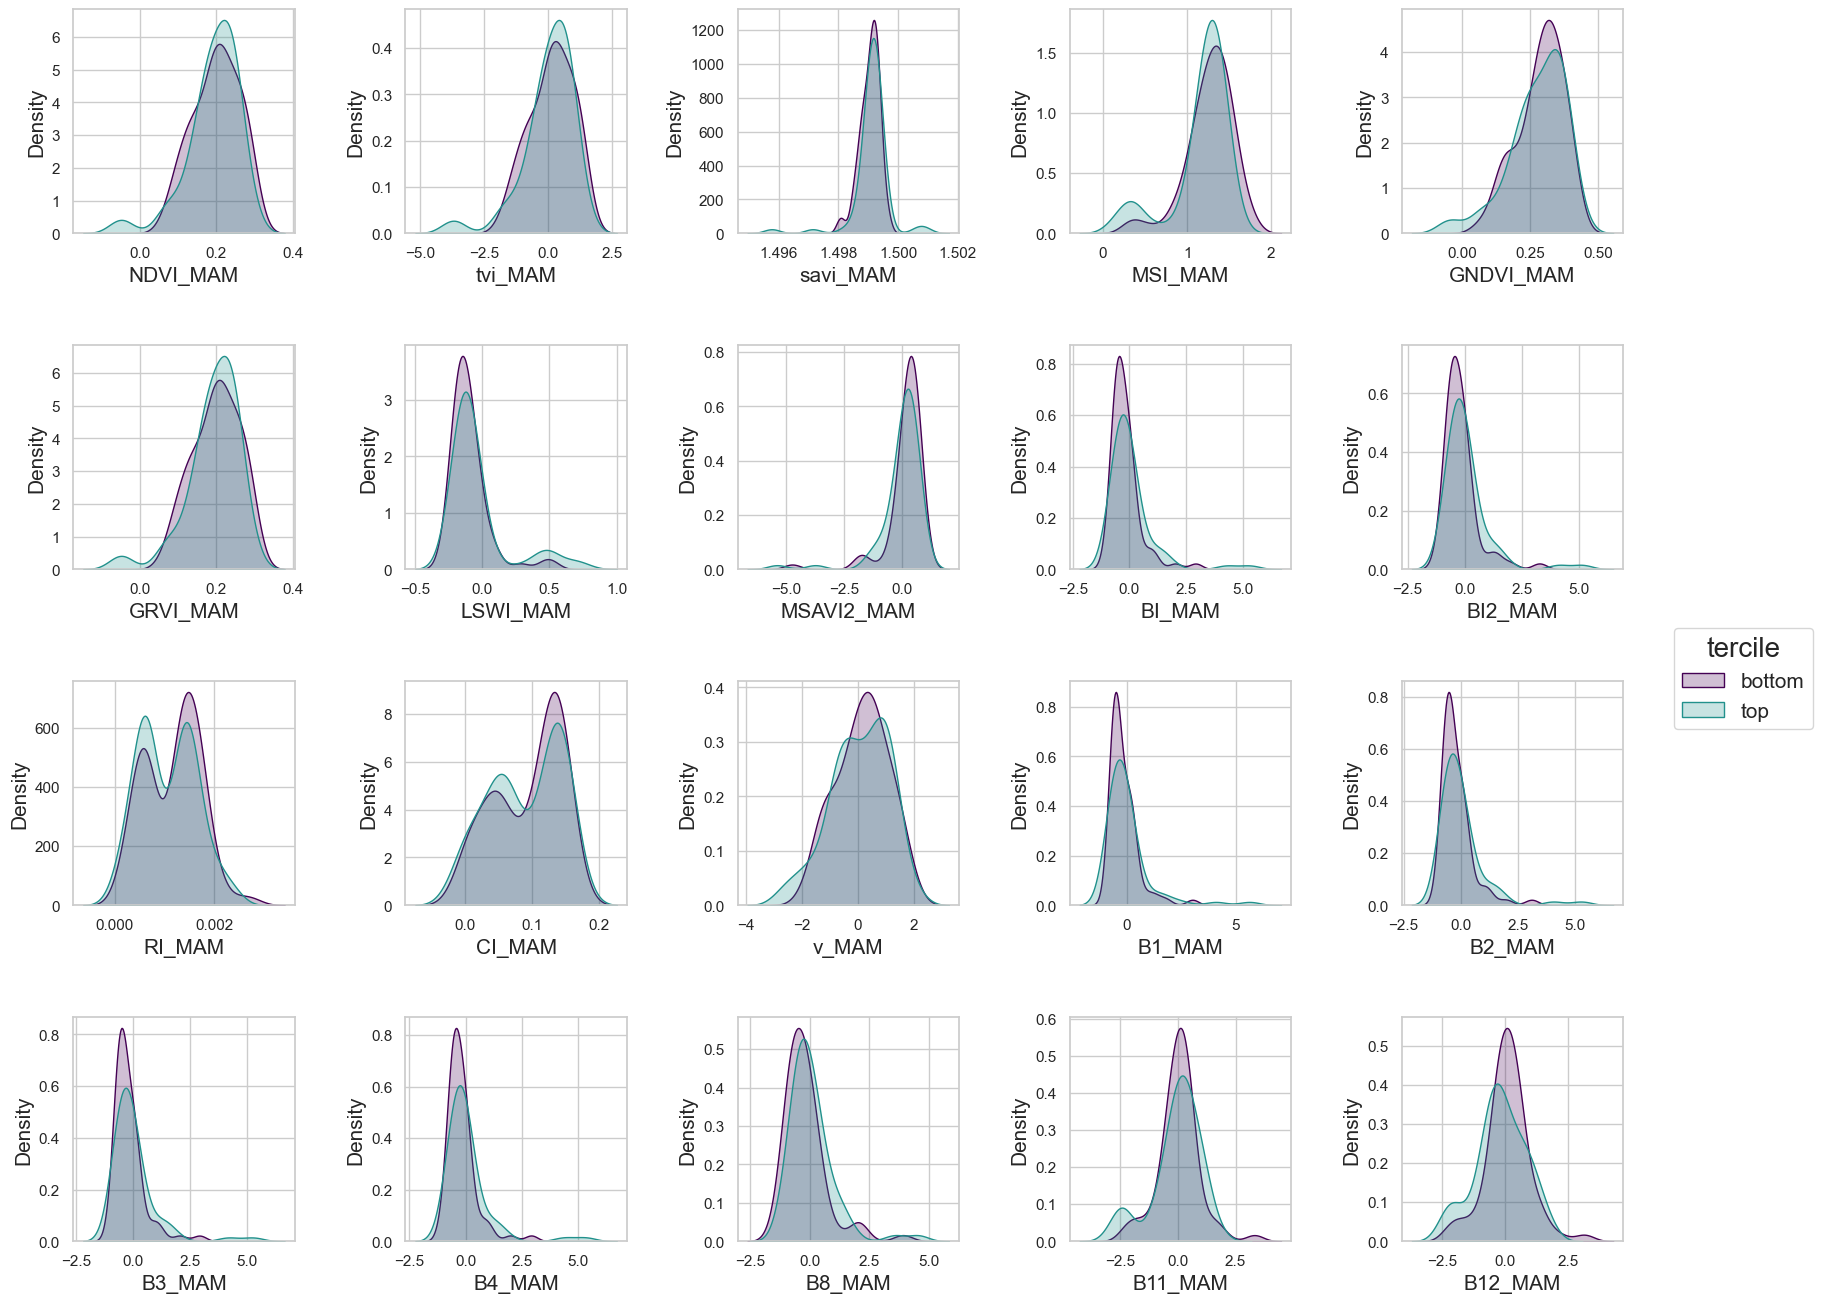

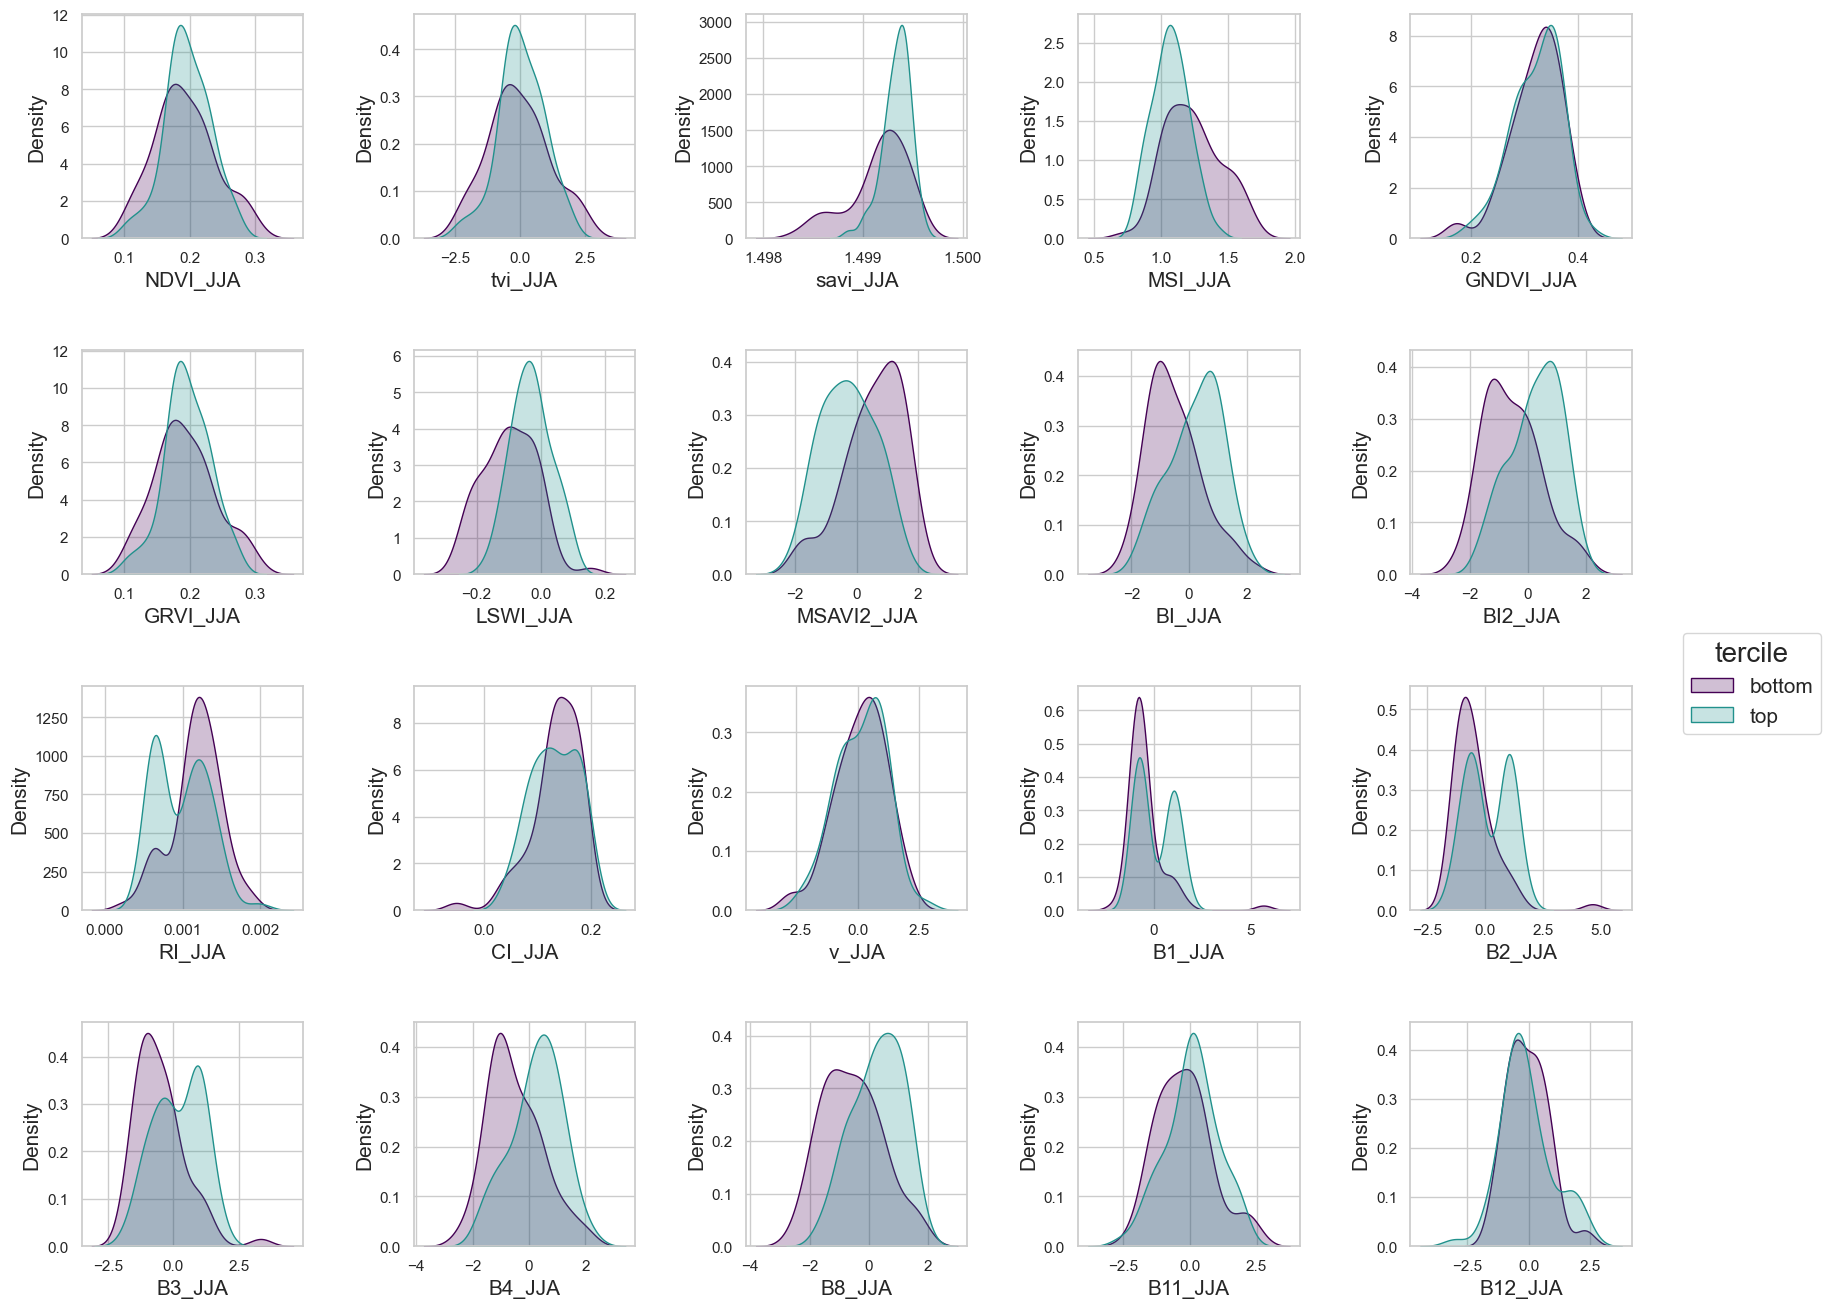

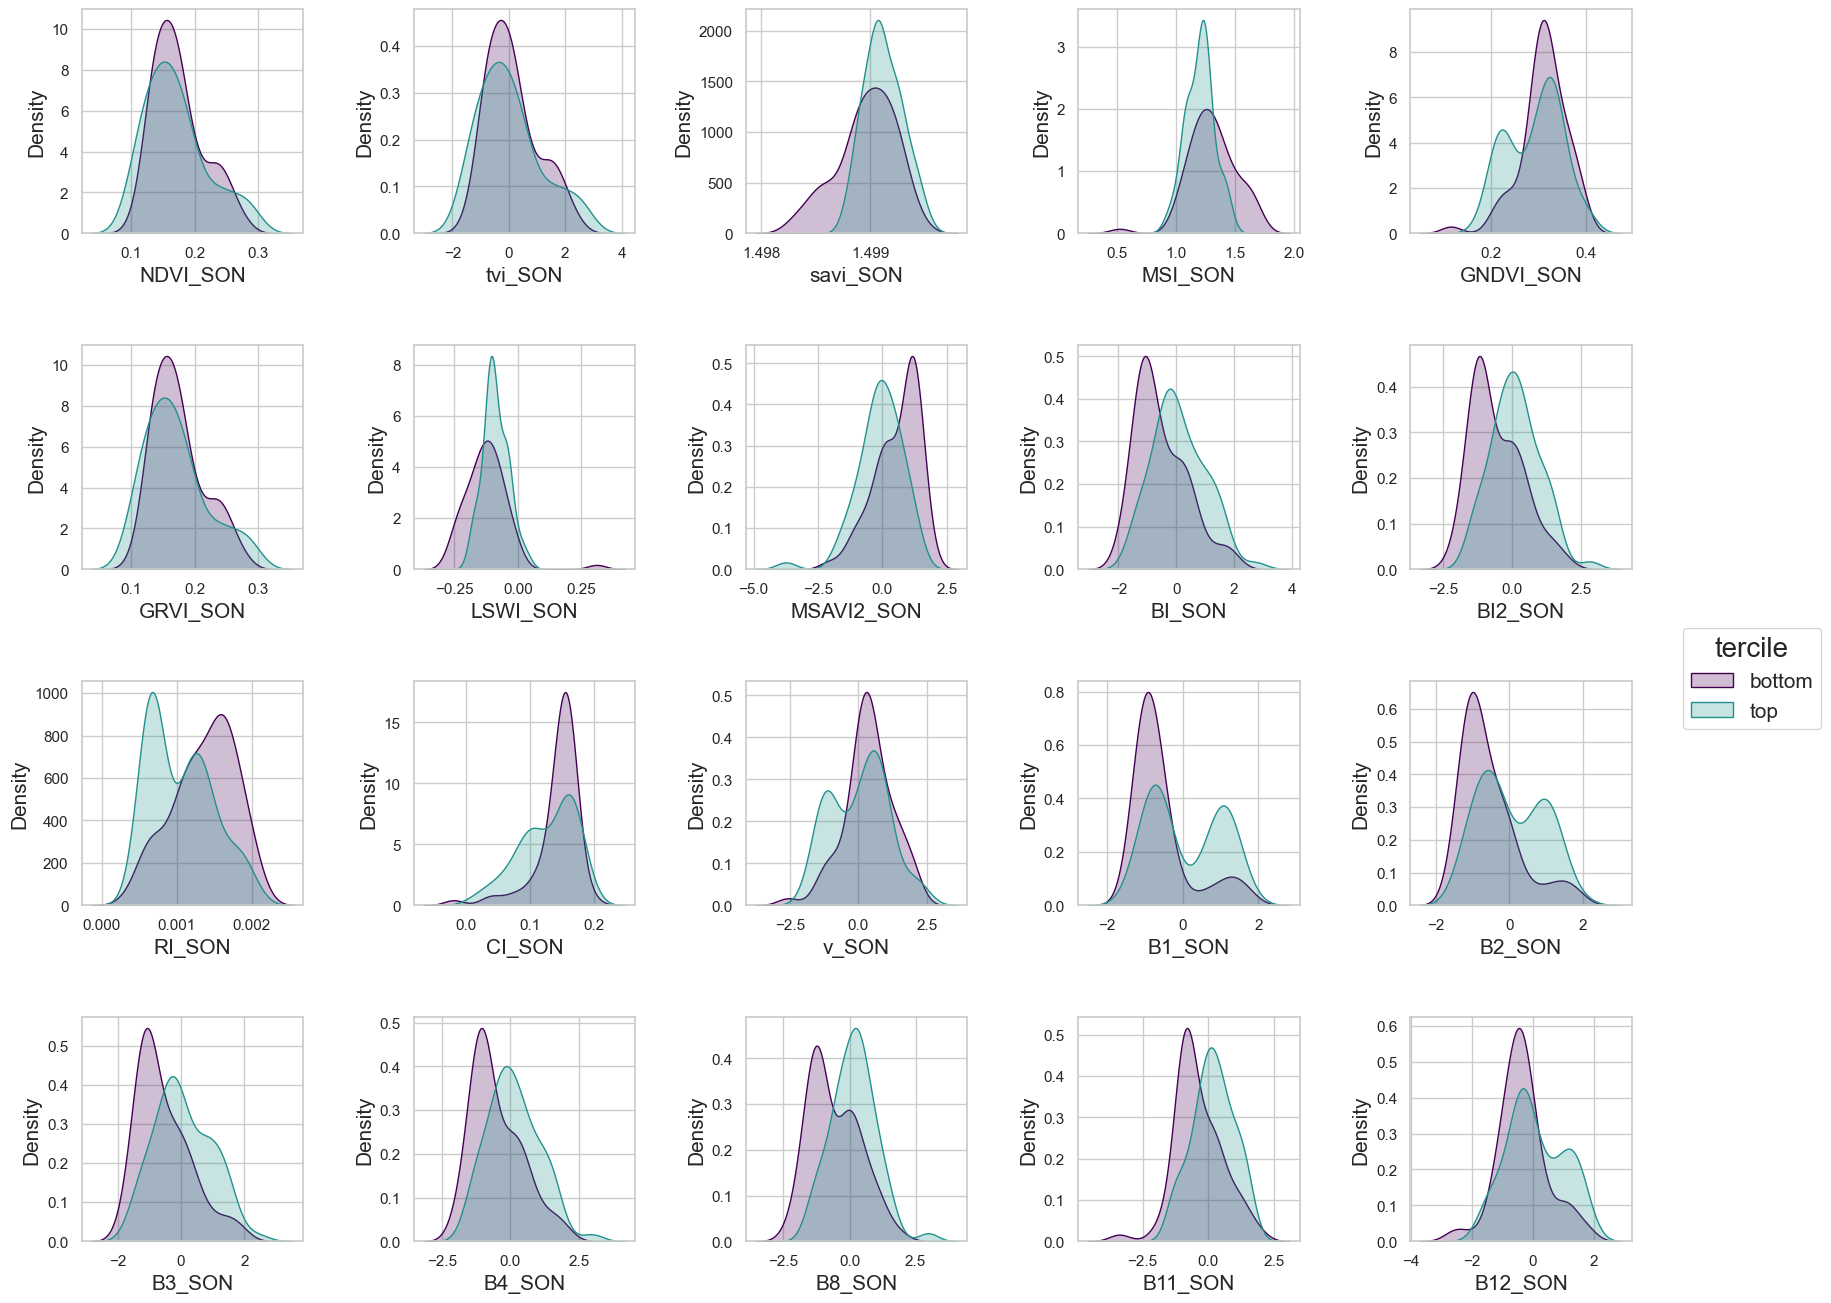

In [264]:
###### ======   Density Distribution of features for top and bottom terciles =====######
# Renaming columns
topBottom_df.columns = topBottom_df.columns.str.replace('_first', '_MAM')
topBottom_df.columns = topBottom_df.columns.str.replace('_second', '_JJA')
topBottom_df.columns = topBottom_df.columns.str.replace('_third', '_SON')
# Get list of columns to be plotted
x_vars = topBottom_df.columns.drop([y_var, 'tercile'])

# Create separate figures for every 20 variables
num_plots_per_fig = 20
num_figs = -(-len(x_vars) // num_plots_per_fig)  # Ceiling division

for fig_num in range(num_figs):
    fig, axes = plt.subplots(4, 5, figsize=(
        20, 16))  # Adjust figsize as needed
    axes = axes.ravel()  # Flatten the axes for easier indexing

    for ax_num, x_var in enumerate(x_vars[fig_num*num_plots_per_fig: (fig_num+1)*num_plots_per_fig]):
        # Choose your own colors
        for tercile, color in zip(['bottom', 'top'], ['#440154', '#21918c']):
            subset = topBottom_df[topBottom_df['tercile'] == tercile]
            sns.kdeplot(ax=axes[ax_num], data=subset, x=x_var,
                        color=color, label=tercile, fill=True)

        # axes[ax_num].set_title(x_var)
        # Set font size for x and y labels
        axes[ax_num].set_xlabel(x_var, fontsize=15)  # Adjust this value as needed
        # Adjust this value as needed
        axes[ax_num].set_ylabel('Density', fontsize=15)
    # Adjust vertical spacing between subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    
    
    # Handle any unused axes
    for ax_num in range(ax_num+1, 20):
        axes[ax_num].axis('off')
    
    # Add a legend to the figure (not to each individual plot)
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='tercile',
               loc='upper right', bbox_to_anchor=(1, 0.5),
               prop={'size': 15}, title_fontsize='20')


    plot_name = path_to_plots + f"figure_{fig_num + 1}.png"
    fig.savefig(plot_name, dpi=300, bbox_inches='tight')
    # plt.close(fig)  # Close the current figure to free up memory

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Mean Absolute Error (MAE): 0.12009718741796628
R-squared (R^2): 0.5335071384546151
Root Mean Squared Error (RMSE): 0.15663165899023193
Feature: WDVI_first, Coefficient: 212242791838.24463
Feature: NDVI_first, Coefficient: 1126058823.9370582
Feature: GRVI_first, Coefficient: 1126058803.4264162
Feature: WDVI_second, Coefficient: 150877425.64076126
Feature: GRVI_second, Coefficient: 144053081.9315621
Feature: NDVI_second, Coefficient: 144053059.53177822
Feature: NDVI_third, Coefficient: 12407099.525570035
Feature: GRVI_third, Coefficient: 12407067.867252298
Feature: WDVI_third, Coefficient: 555320.3712223589
Feature: RI_second, Coefficient: 304.64715217369974
Feature: RI_third, Coefficient: 206.65054262328226
Feature: savi_third, Coefficient: 

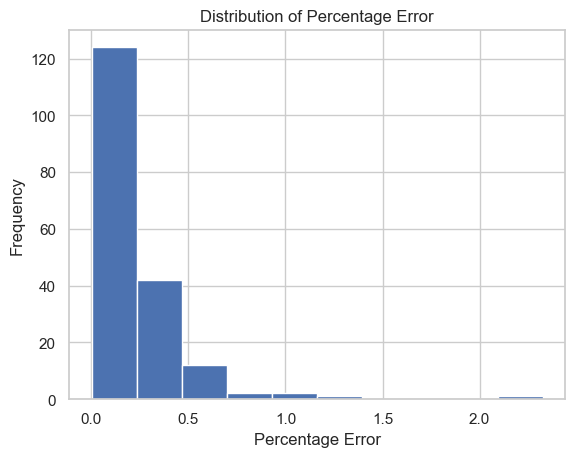

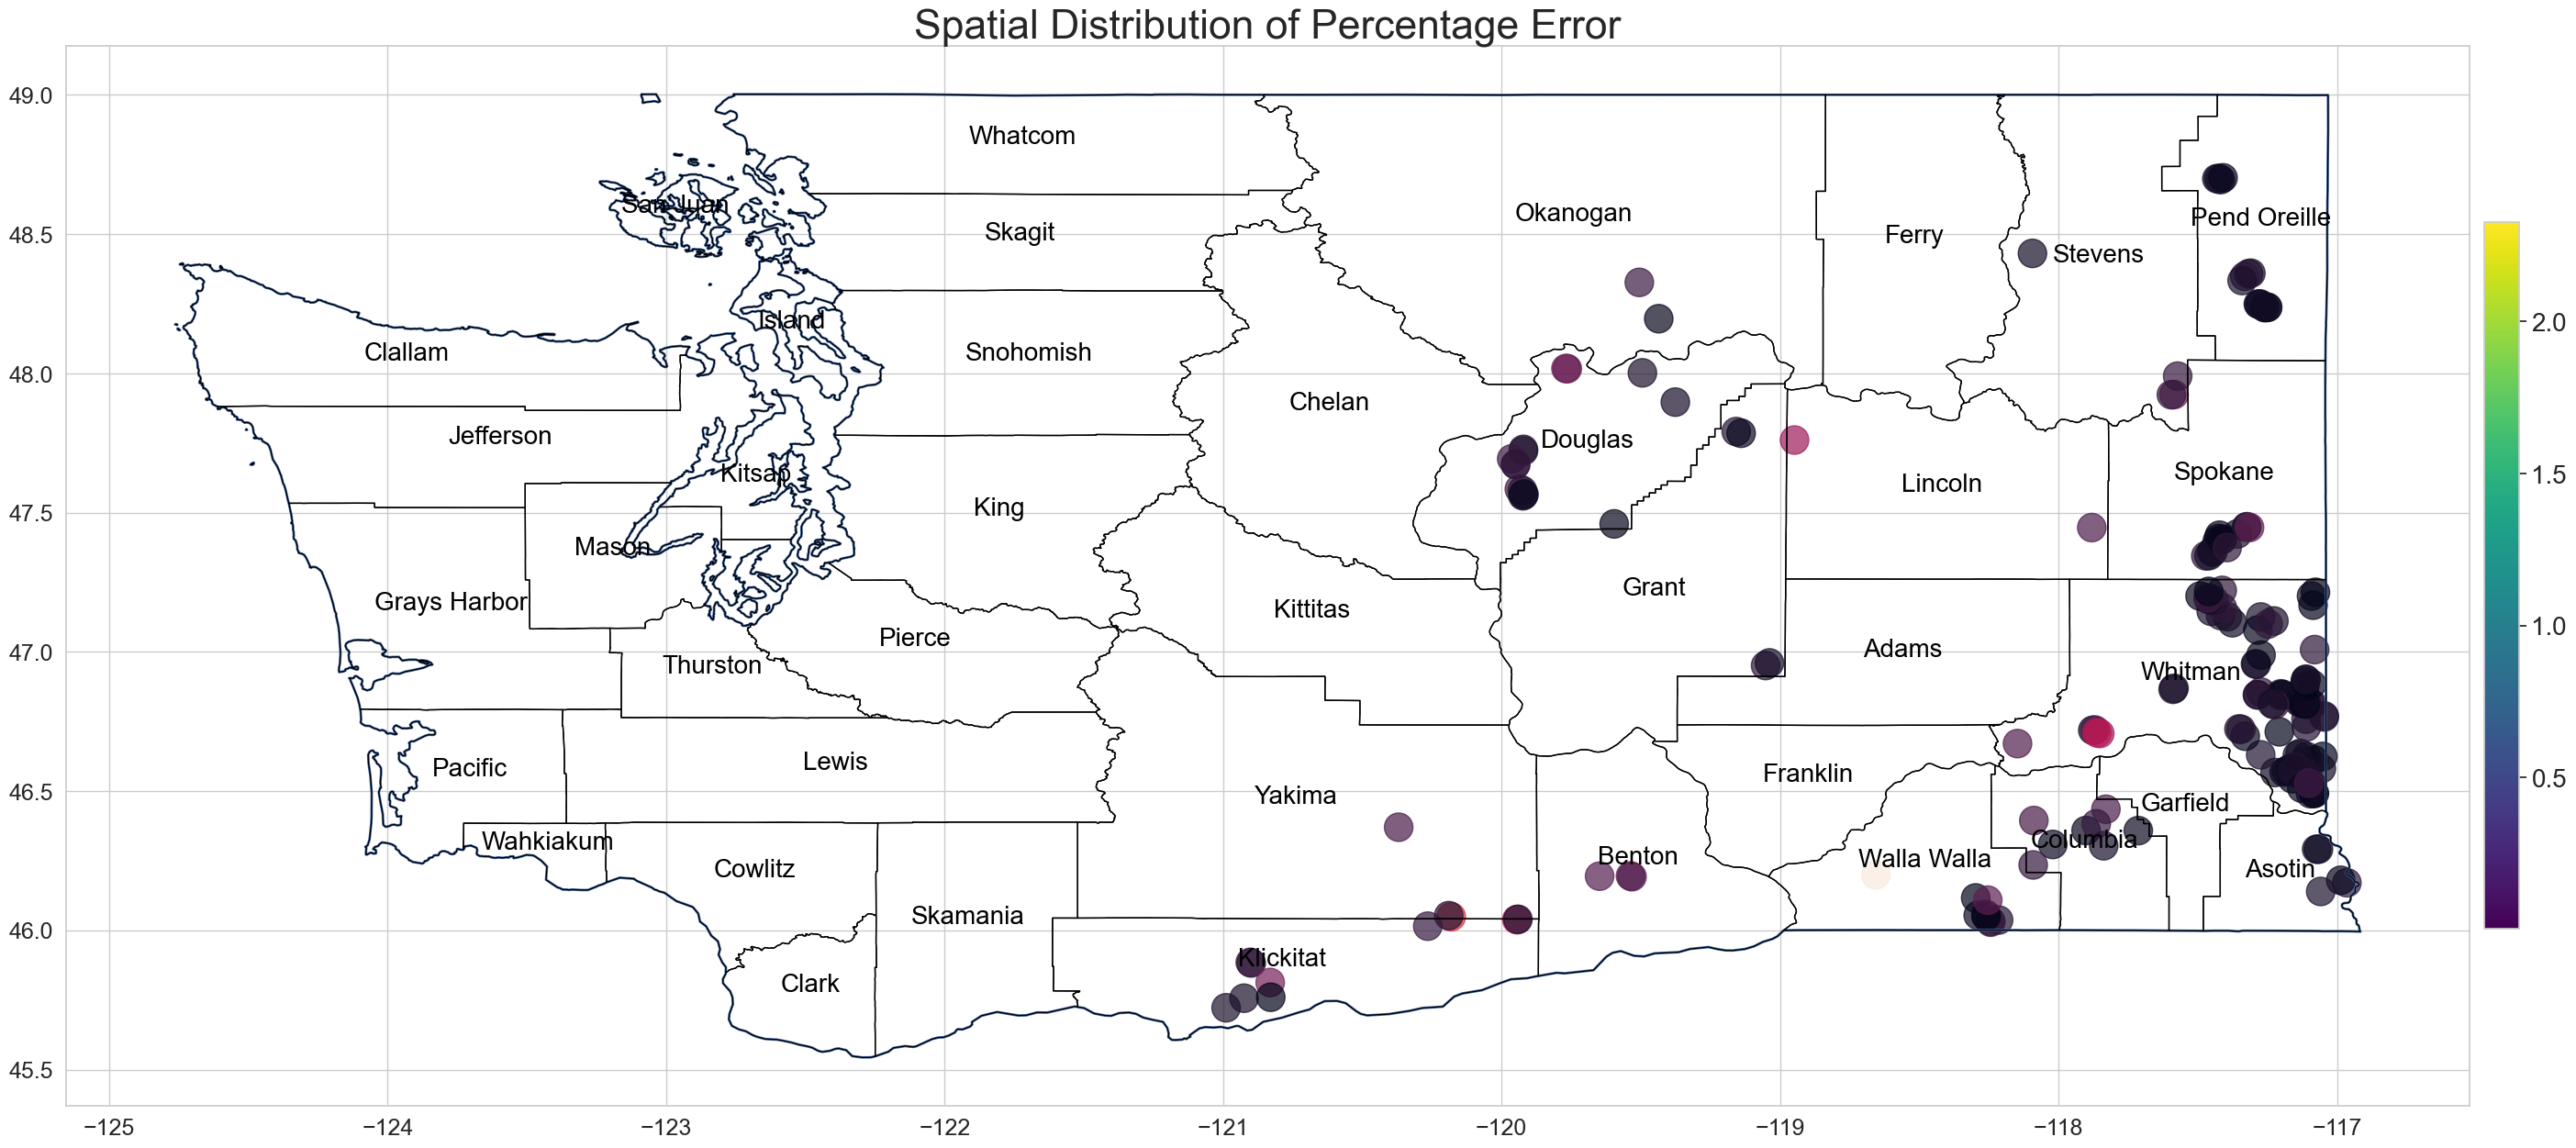

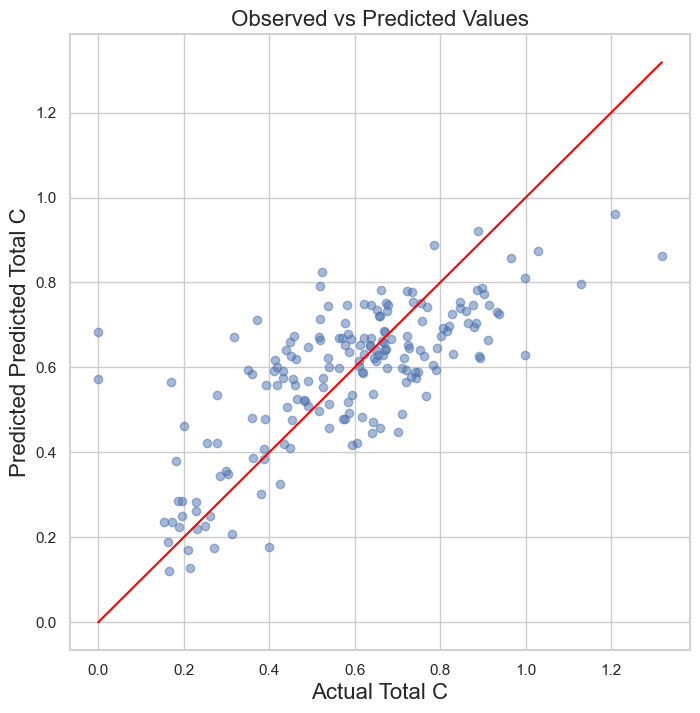

In [232]:
### ==== build OLS ====###

dataset = dry_df.loc[:, "NDVI_first":"Total_C (g/cm2)"].copy()
dataset.drop(columns=["WDVI_first", "WDVI_second", "WDVI_third", "Irrigation"], inplace=True)

# Split the data into dependent and independent variables
X = dataset.drop(columns=['Total_C (g/cm2)', 'geometry'])
X = sm.add_constant(X)  # Adding a constant term to the predictor
y = dataset['Total_C (g/cm2)']

# Ordinary Least Squares (OLS) regression
model = sm.OLS(y, X).fit()

# Predict using the OLS model
y_pred = model.predict(X)

# Model Evaluation
# Calculate residuals
residuals = y - y_pred

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))

# R-squared (R^2)
r2 = model.rsquared

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(residuals**2))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Distribution of Percentage Error
percentage_error = (residuals / y) * 100

# Calculate percetage error with non-zero y
percentage_error = (np.abs(y[(y != 0)] - y_pred[(y != 0)]) / np.abs(y[(y != 0)]))
# Replace infinities with NaNs
percentage_error.replace([np.inf, -np.inf], np.nan, inplace=True)


# Get coefficients
coefficients = model.params

# Drop the constant term
coefficients = coefficients.drop("const")

# Sort coefficients by magnitude for better interpretation
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

# Print each feature and its corresponding coefficient
for feature, coeff in sorted_coefficients.items():
    print(f"Feature: {feature}, Coefficient: {coeff}")


# plot histograms or other plots to visualize the distribution
# of the percentage errors
plt.hist(percentage_error * 100, bins=10)  # Drop NaNs before plotting
plt.title("Distribution of Percentage Error")
plt.xlabel("Percentage Error")
plt.ylabel("Frequency")
plt.savefig(path_to_plots + "%_err-Dist.png", dpi=300, bbox_inches='tight')
plt.show()


#################    Spatial Distribution of Percentage Error #######
dataset['percentage_error'] = percentage_error * 100
# Define the size and axis for the plot
fig, ax = plt.subplots(figsize=(40, 20))
wa_state.boundary.plot(ax=ax, linewidth=2)
wa_counties.boundary.plot(ax=ax, linewidth=1, edgecolor="black")
wa_counties.apply(lambda x: ax.annotate(
    text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=20, color='black'), axis=1)
dataset.plot(column='percentage_error', legend=False, ax=ax, markersize=500, alpha=0.7)
plt.title("Spatial Distribution of Percentage Error", fontsize=32)
# Adjust the font size of tick labels for longitude and latitude
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Create the legend based on the plotted data's colormap
norm = plt.Normalize(vmin=dataset['percentage_error'].min(
), vmax=dataset['percentage_error'].max())
cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(
    norm=norm, cmap='viridis'), ax=ax, shrink=0.5, pad=0.005)
cbar.ax.tick_params(labelsize=20)

plt.savefig(path_to_plots + "%_err_map.png", dpi=300, bbox_inches='tight')
plt.show()


# Scatter plot of y and y_pred
plt.figure(figsize=(8, 8))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # line of equality
plt.title("Observed vs Predicted Values", fontsize=16)
plt.xlabel("Actual Total C", fontsize=16)
plt.ylabel("Predicted Predicted Total C", fontsize=16)
plt.grid(True)
plt.savefig(path_to_plots + "y_ypred.png", dpi=300)
plt.show()


In [238]:
dry_df

NDVI_first  tvi_first  savi_first  MSI_first  GNDVI_first  GRVI_first  \
0      0.124167  -0.934562    1.498692   1.228263     0.262759    0.124167   
1      0.265408   1.054160    1.499216   1.243967     0.377455    0.265408   
2      0.202952   0.198574    1.499026   1.329734     0.334101    0.202952   
5      0.216105   0.382585    1.498700   1.446661     0.332514    0.216105   
6      0.217220   0.398080    1.498909   1.608431     0.325193    0.217220   
..          ...        ...         ...        ...          ...         ...   
164    0.200805   0.159378    1.499280   0.981676     0.233155    0.200805   
167    0.138031  -0.729952    1.499011   1.294351     0.202427    0.138031   
172    0.173565  -0.215588    1.499039   1.162852     0.229657    0.173565   
177    0.194282   0.073485    1.499266   1.127546     0.251665    0.194282   
182    0.226305   0.518322    1.499310   1.138449     0.266499    0.226305   

     LSWI_first  MSAVI2_first  BI_first  BI2_first  ...  CI_third   v_third  \
0     -0.102437      0.290702 -0.259878  -0.326605  ...  0.142317  0.575071   
1     -0.108721      0.459744 -0.531422  -0.517599  ...  0.143152  0.177920   
2     -0.141338      0.497863 -0.493222  -0.537272  ...  0.135148 -0.893422   
5     -0.182308      0.754346 -0.814819  -0.957487  ...  0.160696  1.119908   
6     -0.233255      0.651865 -0.666106  -0.773160  ...  0.146595 -0.057328   
..          ...           ...       ...        ...  ...       ...       ...   
164    0.009947     -0.021898  0.072355   0.112274  ...  0.107821 -0.847939   
167   -0.128232      0.117193  0.086128   0.044313  ...  0.109384 -1.316094   
172   -0.075295      0.337196 -0.188463  -0.254108  ...  0.092204 -1.392810   
177   -0.059864     -0.041829 -0.075591   0.029789  ...  0.081974 -1.282533   
182   -0.064673      0.099167 -0.133569  -0.078488  ...  0.075166 -1.368248   

     B1_third  B2_third  B3_third  B4_third  B8_third  B11_third  B12_third  \
0   -1.191719 -0.975879 -0.876741 -0.937831 -1.148673  -1.329967  -0.670022   
1   -0.907393 -0.900964 -0.863843 -0.891817 -1.051200  -0.990386  -0.877191   
2   -0.609052 -0.672473 -0.691563 -0.706939 -1.260916  -0.935838  -0.238576   
5   -1.272811 -1.254937 -1.397267 -1.440698 -1.470633  -1.210115  -1.494900   
6   -1.031535 -1.169721 -1.321721 -1.397149 -1.799238  -1.001142  -1.098616   
..        ...       ...       ...       ...       ...        ...        ...   
164  1.155968  1.274381  1.478984  1.638953  1.090273   0.967965   0.426648   
167  1.093897  1.096458  1.038610  1.139372  0.799328   1.408959   1.200208   
172  1.031826  1.188228  1.324208  1.433533  1.165594   1.464276   1.456795   
177  1.101906  0.861412  0.674702  0.482851  0.284636   0.975648   1.558479   
182  0.975762  0.564561  0.380812  0.048183 -0.145873   0.368705   1.217314   

     Total_C (g/cm2)  
0           0.164592  
1           0.181783  
2           0.164470  
5           0.720374  
6           0.389105  
..               ...  
164         0.742493  
167         0.672998  
172         0.807598  
177         0.711678  
182         0.464271  

[125 rows x 61 columns]

Cross-Validation Scores: [0.76 0.76 0.64 0.84 0.56]
Average Cross-Validation Score: 0.712
Predicted  bottom  top
Actual                
bottom         48   15
top             7   55
Feature: B12_first, Coefficient: -1.5125664229158757
Feature: B1_third, Coefficient: 1.2150109497266484
Feature: B11_first, Coefficient: 1.0451006534337124
Feature: v_first, Coefficient: 1.0364794183172228
Feature: tvi_first, Coefficient: -0.7525746124303534
Feature: v_second, Coefficient: 0.5500584713902956
Feature: B11_third, Coefficient: 0.5112808348893864
Feature: B4_second, Coefficient: 0.43874498058161004
Feature: B4_first, Coefficient: 0.4375081101070273
Feature: B8_second, Coefficient: 0.417081176880044
Feature: MSI_first, Coefficient: 0.3987293792502882
Feature: B1_second, Coefficient: 0.37399729381800967
Feature: B12_second, Coefficient: -0.3525387864541436
Feature: B2_third, Coefficient: 0.3506017818783425
Feature: tvi_second, Coefficient: -0.3401563920078645
Feature: B11_second, Coefficient: -0.

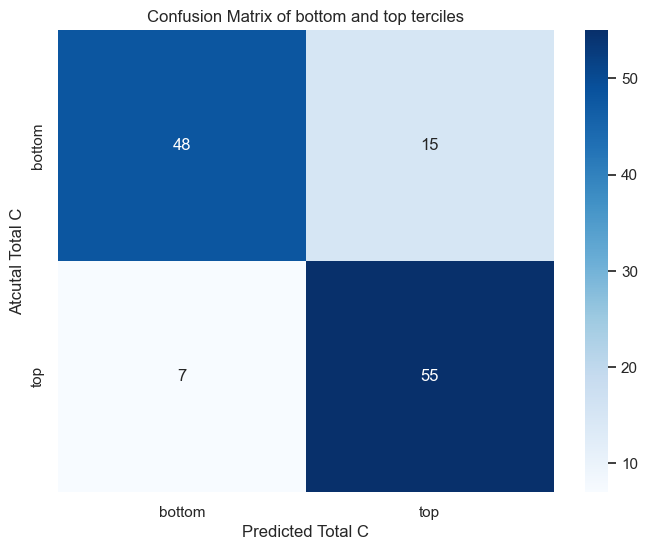

In [240]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

dataset = dry_df.loc[:, "NDVI_first":"Total_C (g/cm2)"].copy()
dataset.drop(columns=["WDVI_first", "WDVI_second", "WDVI_third", "Irrigation"], inplace=True)


# Set the terciles to use for separating the data
bottom_tercile = dataset[y_var].quantile(1/3)
top_tercile = dataset[y_var].quantile(2/3)

# Create a new column in the DataFrame to indicate whether each row is in the top, middle, or bottom tercile
dataset['tercile'] = pd.cut(dataset[y_var], bins=[dataset[y_var].min(
), bottom_tercile, top_tercile, dataset[y_var].max()], labels=['bottom', 'middle', 'top'], include_lowest=True)

# filter for just top and bottom tercils
topBottom_df = dataset.loc[dataset['tercile'] != 'middle'].copy()
topBottom_df['tercile'] = topBottom_df['tercile'].cat.remove_unused_categories()
#############


# Split the data into dependent and independent variables
X_terciles = topBottom_df.drop(
    columns=['tercile', 'geometry', 'Total_C (g/cm2)'])
y_terciles = topBottom_df['tercile']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_terciles, y_terciles, test_size=0.5, random_state=42)

# Initialize the classifier
classifier = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=3)
print("Cross-Validation Scores for each fold:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Generate a contingency table
contingency_table = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(contingency_table)

# [Your code for printing feature importance]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['bottom', 'top'])

# Plotting using matplotlib and seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Total C')
ax.set_ylabel('Actual Total C')
ax.set_title('Confusion Matrix of bottom and top terciles')
ax.xaxis.set_ticklabels(['bottom', 'top'])
ax.yaxis.set_ticklabels(['bottom', 'top'])
plt.savefig(path_to_plots + "CM_bottom_top_test.png", dpi=300)
plt.show()

In [ ]:
df['Total_C (g/cm2)']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

dataset = dry_df.loc[:, "NDVI_first":"Total_C (g/cm2)"].copy()
dataset.drop(columns=["WDVI_third", "Irrigation"], inplace=True)
df = dataset

# Set the name of your y-variable
y_var = 'Total_C (g/cm2)'

# Set the terciles to use for separating the data
bottom_tercile = np.percentile(df[y_var], 33.33)
top_tercile = np.percentile(df[y_var], 66.66)

# Subset the DataFrame to include only top and bottom tercile rows
df_terciles = df[(df[y_var] <= bottom_tercile) |
                 (df[y_var] >= top_tercile)].copy()

# Create a new column for the target variable ('high' or 'low') based on tercile membership
df_terciles['target'] = np.where(
    df_terciles[y_var] >= top_tercile, 'high', 'low')

# Select only the X variables of interest
# Replace with the actual X variable names
X_terciles = df_terciles[['NDVI_first', 'tvi_first',
       'savi_first', 'MSI_first', 'GNDVI_first', 'GRVI_first', 'LSWI_first',
       'MSAVI2_first', 'WDVI_first', 'BI_first', 'BI2_first', 'RI_first',
       'CI_first', 'B1_first', 'B2_first', 'B3_first', 'B4_first', 'B8_first',
       'B11_first', 'B12_first', 'NDVI_second', 'tvi_second', 'savi_second',
       'MSI_second', 'GNDVI_second', 'GRVI_second', 'LSWI_second',
       'MSAVI2_second', 'WDVI_second', 'BI_second', 'BI2_second', 'RI_second',
       'CI_second', 'B1_second', 'B2_second', 'B3_second', 'B4_second',
       'B8_second', 'B11_second', 'B12_second']]
y_terciles = df_terciles['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_terciles, y_terciles, test_size=0.5, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=3)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
test_score = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(conf_matrix, index=['Actual low', 'Actual high'], columns=['Predicted low', 'Predicted high'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the test score
print("Test Score:", test_score)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load your data into a Pandas DataFrame
df = df_second[selected_cols]

# Set the name of your y-variable
y_var = 'Total_C_g/cm2'

# Set the terciles to use for separating the data
bottom_tercile = np.percentile(df[y_var], 33.33)
top_tercile = np.percentile(df[y_var], 66.66)

# Subset the DataFrame to include only top and bottom tercile rows
df_terciles = df[(df[y_var] <= bottom_tercile) |
                 (df[y_var] >= top_tercile)].copy()

# Create a new column for the target variable ('high' or 'low') based on tercile membership
df_terciles['target'] = np.where(
    df_terciles[y_var] >= top_tercile, 'high', 'low')

# Select only the X variables of interest
# Replace with the actual X variable names
X_terciles = df_terciles[['NDVI_second', 'tvi_second',
                          'savi_second', 'MSI_second', 'GNDVI_second', 'GRVI_second', 'LSWI_second',
                          'MSAVI2_second', 'BI_second', 'BI2_second', 'RI_second',
                          'CI_second', 'B1_second', 'B2_second', 'B3_second',
                          'B4_second', 'B8_second', 'B11_second', 'B12_second']]
y_terciles = df_terciles['target']

# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X_terciles, y_terciles, test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_terciles, y_terciles, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Train the classifier on the entire data
classifier.fit(X_terciles, y_terciles)

# Make predictions on the testing data
y_pred = classifier.predict(X_terciles)

# Generate a contingency table
contingency_table = pd.crosstab(y_terciles, y_pred, rownames=['Actual'], colnames=['Predicted'])

print(contingency_table)


In [ ]:
df1 = df.loc[~df.SampleID.duplicated()]
df1.loc[df1.SampleID.isin(averaged_C.SampleID), 'Total_C_g/cm2'] = averaged_C['Total_C_g/cm2'].values
df1.loc[df1.SampleID.isin(averaged_C.SampleID), 'Total_C_g/cm2']

In [ ]:
df1.columns

In [ ]:
# Normalize band values
from sklearn.preprocessing import StandardScaler
# assuming df is your pandas dataframe
scaler = StandardScaler()

# select the columns you want to normalize
cols_to_normalize = ['NDVI_first', 'tvi_first',
       'savi_first', 'MSI_first', 'GNDVI_first', 'GRVI_first', 'LSWI_first',
       'MSAVI2_first', 'WDVI_first', 'BI_first', 'BI2_first', 'RI_first',
       'CI_first', 'B1_first', 'B2_first', 'B3_first', 'B4_first', 'B8_first',
       'B11_first', 'B12_first', 'NDVI_second', 'tvi_second', 'savi_second',
       'MSI_second', 'GNDVI_second', 'GRVI_second', 'LSWI_second',
       'MSAVI2_second', 'WDVI_second', 'BI_second', 'BI2_second', 'RI_second',
       'CI_second', 'B1_second', 'B2_second', 'B3_second', 'B4_second',
       'B8_second', 'B11_second', 'B12_second']

# fit the scaler on the selected columns
scaler.fit(df[cols_to_normalize])

# transform the selected columns to have zero mean and unit variance
df[cols_to_normalize] = scaler.transform(df[cols_to_normalize])


In [ ]:
df1.iloc[:, 8:]

In [ ]:
import matplotlib.pyplot as plt

# Increase the font size of the labels
plt.rcParams.update({'font.size': 12})

# Increase the resolution of the plot
plt.figure(figsize=(12, 8), dpi=300)

# Plot the density distribution of column 'Total_C_g/cm2'
df1['Total_C_g/cm2'].plot(kind='density')

# Set x-axis label
plt.xlabel('Total C (g/cm$^2$)', fontsize=14)

# Mark actual values on the curve
min_value = df1['Total_C_g/cm2'].min()
max_value = df1['Total_C_g/cm2'].max()

# Plotting the actual values on the curve
plt.axvline(x=min_value, color='red', linestyle='--', label='Min')
plt.axvline(x=max_value, color='blue', linestyle='--', label='Max')

# Display legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [ ]:
df_first['Total_C_g/cm2'].describe()

In [ ]:
df1.columns

In [ ]:
selected_cols = ['NDVI_first', 'tvi_first',
       'savi_first', 'MSI_first', 'GNDVI_first', 'GRVI_first', 'LSWI_first',
       'MSAVI2_first', 'WDVI_first', 'BI_first', 'BI2_first', 'RI_first',
       'CI_first', 'B1_first', 'B2_first', 'B3_first', 'B4_first', 'B8_first',
       'B11_first', 'B12_first', 'NDVI_second', 'tvi_second', 'savi_second',
       'MSI_second', 'GNDVI_second', 'GRVI_second', 'LSWI_second',
       'MSAVI2_second', 'WDVI_second', 'BI_second', 'BI2_second', 'RI_second',
       'CI_second', 'B1_second', 'B2_second', 'B3_second', 'B4_second',
       'B8_second', 'B11_second', 'B12_second', 'Total_C_g/cm2']

df = df1[selected_cols]
df

In [ ]:
df.nunique()[df.nunique() == 1].index[0]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load your data into a Pandas DataFrame
df = df1[selected_cols].copy()

# Drop columns with just one value
# df.drop(columns= df.nunique()[df.nunique() == 1].index[0], inplace=True )

# Set the name of your y-variable
y_var = 'Total_C_g/cm2'

# Set the terciles to use for separating the data
bottom_tercile = np.percentile(df[y_var], 33.33)
top_tercile = np.percentile(df[y_var], 66.66)

# Create a new column in the DataFrame to indicate whether each row is in the top, middle, or bottom tercile
df['tercile'] = pd.cut(df[y_var], bins=[df[y_var].min(
), bottom_tercile, top_tercile, df[y_var].max()], labels=['bottom', 'middle', 'top'])

# Loop through each x-variable and create a density distribution plot for the top, middle, and bottom terciles
for x_var in df.columns.drop([y_var, 'tercile']):
    g = sns.FacetGrid(df[df['tercile'] != 'middle'], hue='tercile', height=4, aspect=1.2)
    g.map(sns.kdeplot, x_var, shade=True)
    g.add_legend()


In [ ]:
df1.loc[df['tercile'] == 'top']['Total_C_g/cm2'].describe()

In [ ]:
Y = df1['Total_C_g/cm2']
X = df1[['NDVI_first', 'tvi_first',
       'savi_first', 'MSI_first', 'GNDVI_first', 'GRVI_first', 'LSWI_first',
       'MSAVI2_first', 'WDVI_first', 'BI_first', 'BI2_first', 'RI_first',
       'CI_first', 'B1_first', 'B2_first', 'B3_first', 'B4_first', 'B8_first',
       'B11_first', 'B12_first', 'NDVI_second', 'tvi_second', 'savi_second',
       'MSI_second', 'GNDVI_second', 'GRVI_second', 'LSWI_second',
       'MSAVI2_second', 'WDVI_second', 'BI_second', 'BI2_second', 'RI_second',
       'CI_second', 'B1_second', 'B2_second', 'B3_second', 'B4_second',
       'B8_second', 'B11_second', 'B12_second']]
# X = df_second[['B12_second']]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

In [ ]:
import seaborn as sns

# calculate the correlation matrix
corr_matrix = df[['NDVI_first', 'tvi_first',
       'savi_first', 'MSI_first', 'GNDVI_first', 'GRVI_first', 'LSWI_first',
       'MSAVI2_first', 'WDVI_first', 'BI_first', 'BI2_first', 'RI_first',
       'CI_first', 'B1_first', 'B2_first', 'B3_first', 'B4_first', 'B8_first',
       'B11_first', 'B12_first', 'NDVI_second', 'tvi_second', 'savi_second',
       'MSI_second', 'GNDVI_second', 'GRVI_second', 'LSWI_second',
       'MSAVI2_second', 'WDVI_second', 'BI_second', 'BI2_second', 'RI_second',
       'CI_second', 'B1_second', 'B2_second', 'B3_second', 'B4_second',
       'B8_second', 'B11_second', 'B12_second']].corr()


# plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# show the plot
plt.show()


In [ ]:
selected_cols = ['NDVI_first', 'tvi_first',
       'savi_first', 'MSI_first', 'GNDVI_first', 'GRVI_first', 'LSWI_first',
       'MSAVI2_first', 'WDVI_first', 'BI_first', 'BI2_first', 'RI_first',
       'CI_first', 'B1_first', 'B2_first', 'B3_first', 'B4_first', 'B8_first',
       'B11_first', 'B12_first', 'NDVI_second', 'tvi_second', 'savi_second',
       'MSI_second', 'GNDVI_second', 'GRVI_second', 'LSWI_second',
       'MSAVI2_second', 'WDVI_second', 'BI_second', 'BI2_second', 'RI_second',
       'CI_second', 'B1_second', 'B2_second', 'B3_second', 'B4_second',
       'B8_second', 'B11_second', 'B12_second', 'Total_C_g/cm2']

In [ ]:
df = df1[selected_cols]
df.reset_index(inplace=True)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load your data into a Pandas DataFrame
df = df1[selected_cols]

# # Drop columns with just one value
# df.drop(columns= df.nunique()[df.nunique() == 1].index[0], inplace=True )

# Set the name of your y-variable
y_var = 'Total_C_g/cm2'

# Set the terciles to use for separating the data
bottom_tercile = np.percentile(df[y_var], 33.33)
top_tercile = np.percentile(df[y_var], 66.66)

# Create a new column in the DataFrame to indicate whether each row is in the top, middle, or bottom tercile
df['tercile'] = pd.cut(df[y_var], bins=[df[y_var].min(
), bottom_tercile, top_tercile, df[y_var].max()], labels=['bottom', 'middle', 'top'])

# Loop through each x-variable and create a density distribution plot for the top, middle, and bottom terciles
for x_var in df.columns.drop([y_var, 'tercile']):
    g = sns.FacetGrid(df[df['tercile'] != 'middle'], hue='tercile', height=4, aspect=1.2)
    g.map(sns.kdeplot, x_var, shade=True)
    g.add_legend()

In [ ]:
Y = df_second['Total_C_g/cm2']
X = df_second[['NDVI_second', 'tvi_second',
               'savi_second', 'MSI_second', 'GNDVI_second', 'GRVI_second', 'LSWI_second',
               'MSAVI2_second', 'BI_second', 'BI2_second', 'RI_second',
               'CI_second',
               'B2_second', 'B3_second', 'B4_second', 'B8_second', 'B11_second',
               'B12_second']]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load your data into a Pandas DataFrame
df = df1[selected_cols]

# Set the name of your y-variable
y_var = 'Total_C_g/cm2'

# Set the terciles to use for separating the data
bottom_tercile = np.percentile(df[y_var], 33.33)
top_tercile = np.percentile(df[y_var], 66.66)

# Subset the DataFrame to include only top and bottom tercile rows
df_terciles = df[(df[y_var] <= bottom_tercile) |
                 (df[y_var] >= top_tercile)].copy()

# Create a new column for the target variable ('high' or 'low') based on tercile membership
df_terciles['target'] = np.where(
    df_terciles[y_var] >= top_tercile, 'high', 'low')

# Select only the X variables of interest
# Replace with the actual X variable names
X_terciles = df_terciles[['NDVI_first', 'tvi_first',
       'savi_first', 'MSI_first', 'GNDVI_first', 'GRVI_first', 'LSWI_first',
       'MSAVI2_first', 'WDVI_first', 'BI_first', 'BI2_first', 'RI_first',
       'CI_first', 'B1_first', 'B2_first', 'B3_first', 'B4_first', 'B8_first',
       'B11_first', 'B12_first', 'NDVI_second', 'tvi_second', 'savi_second',
       'MSI_second', 'GNDVI_second', 'GRVI_second', 'LSWI_second',
       'MSAVI2_second', 'WDVI_second', 'BI_second', 'BI2_second', 'RI_second',
       'CI_second', 'B1_second', 'B2_second', 'B3_second', 'B4_second',
       'B8_second', 'B11_second', 'B12_second']]
y_terciles = df_terciles['target']

# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X_terciles, y_terciles, test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_terciles, y_terciles, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Train the classifier on the entire data
classifier.fit(X_terciles, y_terciles)

# Make predictions on the testing data
y_pred = classifier.predict(X_terciles)

# Generate a contingency table
contingency_table = pd.crosstab(y_terciles, y_pred, rownames=['Actual'], colnames=['Predicted'])

print(contingency_table)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load your data into a Pandas DataFrame
df = df1[selected_cols]

# Set the name of your y-variable
y_var = 'Total_C_g/cm2'

# Set the terciles to use for separating the data
bottom_tercile = np.percentile(df[y_var], 33.33)
top_tercile = np.percentile(df[y_var], 66.66)

# Subset the DataFrame to include only top and bottom tercile rows
df_terciles = df[(df[y_var] <= bottom_tercile) |
                 (df[y_var] >= top_tercile)].copy()

# Create a new column for the target variable ('high' or 'low') based on tercile membership
df_terciles['target'] = np.where(
    df_terciles[y_var] >= top_tercile, 'high', 'low')

# Select only the X variables of interest
# Replace with the actual X variable names
X_terciles = df_terciles[['NDVI_first', 'tvi_first',
       'savi_first', 'MSI_first', 'GNDVI_first', 'GRVI_first', 'LSWI_first',
       'MSAVI2_first', 'WDVI_first', 'BI_first', 'BI2_first', 'RI_first',
       'CI_first', 'B1_first', 'B2_first', 'B3_first', 'B4_first', 'B8_first',
       'B11_first', 'B12_first', 'NDVI_second', 'tvi_second', 'savi_second',
       'MSI_second', 'GNDVI_second', 'GRVI_second', 'LSWI_second',
       'MSAVI2_second', 'WDVI_second', 'BI_second', 'BI2_second', 'RI_second',
       'CI_second', 'B1_second', 'B2_second', 'B3_second', 'B4_second',
       'B8_second', 'B11_second', 'B12_second']]
y_terciles = df_terciles['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_terciles, y_terciles, test_size=0.25, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=3)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
test_score = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(conf_matrix, index=['Actual low', 'Actual high'], columns=['Predicted low', 'Predicted high'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the test score
print("Test Score:", test_score)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load your data into a Pandas DataFrame
df = df_second[selected_cols]

# Set the name of your y-variable
y_var = 'Total_C_g/cm2'

# Set the terciles to use for separating the data
bottom_tercile = np.percentile(df[y_var], 33.33)
top_tercile = np.percentile(df[y_var], 66.66)

# Subset the DataFrame to include only top and bottom tercile rows
df_terciles = df[(df[y_var] <= bottom_tercile) |
                 (df[y_var] >= top_tercile)].copy()

# Create a new column for the target variable ('high' or 'low') based on tercile membership
df_terciles['target'] = np.where(
    df_terciles[y_var] >= top_tercile, 'high', 'low')

# Select only the X variables of interest
# Replace with the actual X variable names
X_terciles = df_terciles[['NDVI_second', 'tvi_second',
                          'savi_second', 'MSI_second', 'GNDVI_second', 'GRVI_second', 'LSWI_second',
                          'MSAVI2_second', 'BI_second', 'BI2_second', 'RI_second',
                          'CI_second', 'B1_second', 'B2_second', 'B3_second',
                          'B4_second', 'B8_second', 'B11_second', 'B12_second']]
y_terciles = df_terciles['target']

# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X_terciles, y_terciles, test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_terciles, y_terciles, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Train the classifier on the entire data
classifier.fit(X_terciles, y_terciles)

# Make predictions on the testing data
y_pred = classifier.predict(X_terciles)

# Generate a contingency table
contingency_table = pd.crosstab(y_terciles, y_pred, rownames=['Actual'], colnames=['Predicted'])

print(contingency_table)
